### I. Python

#### a) В python2.7 есть ф-ции range, и xrange, в чем разница?

Ф-ция range() возвращает список (list), содержащий все элементы запрашиваемого диапазона.

Ф-ция xrange() возвращает объект типа xrange. Элементы возвращаются не все сразу, а по одному, по требованию. Таким образом, метод xrange() позволяет не хранить все элементы в памяти. xrange поддерживает итерирование, индексацию, поддерживает метод len(). 

В Python3 есть только один метод range(), который является новой реализацией метода xrange()

#### b) Написать на python 2 или 3 генератор первых n чисел фибоначи.

In [1]:
# Использую Python3

In [2]:
def fibonacci_generator(n):
    prev = [0, 1]
    for el in range(0,n):
        prev.append(sum(prev))
        yield prev.pop(0)

In [3]:
# Пример использования
n = 15
for el in fibonacci_generator(n):
    print(el)

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377


### II. SQL

#### 1. Вывести отдел с наибольшим числом сотрудников

<img src="img/Screenshot_1.png">

#### 2. Вывести список сотрудников, получающих заработную плату выше, чем у руководителя

### III. Задача на определение отрасли компании

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pickle

import random
import math
from sklearn.metrics import f1_score, accuracy_score, precision_score, roc_auc_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import skew, kurtosis
import xgboost
import lightgbm
import catboost
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_rows', 500)

Using TensorFlow backend.


In [2]:
def save_to_pickle(data, filename):
        with open(filename, 'wb') as handle:
            pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        return

def load_from_pickle(filename):
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    return data

In [152]:
# Загрузка данных
data_pays = pd.read_csv("data/Pays.csv")
data_info = pd.read_csv("data/inn_info_public.csv")

In [153]:
data_pays.head(20)

,hash_inn_kt,hash_inn_dt,week,count,sum
0,0,0,1,4,38399.600
1,0,0,5,2,399.600
2,0,0,7,2,79.600
3,0,0,9,2,239.600
4,0,0,12,2,79.600
5,0,0,15,2,399.600
6,0,0,16,2,0.920
7,0,0,20,4,2399.600
8,0,0,21,4,0.800
9,0,0,22,2,239.600


In [154]:
data_info.head()

,hash_inn,okved2,region,is_public
0,61058,34,86,True
1,8311,18,86,True
2,130273,-1,86,False
3,64081,43,86,True
4,218005,12,86,True


In [155]:
data_pays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430150 entries, 0 to 5430149
Data columns (total 5 columns):
hash_inn_kt    int64
hash_inn_dt    int64
week           int64
count          int64
sum            float64
dtypes: float64(1), int64(4)
memory usage: 207.1 MB


In [156]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240069 entries, 0 to 240068
Data columns (total 4 columns):
hash_inn     240069 non-null int64
okved2       240069 non-null int64
region       240069 non-null int64
is_public    240069 non-null bool
dtypes: bool(1), int64(3)
memory usage: 5.7 MB


In [157]:
data_pays.describe()

,hash_inn_kt,hash_inn_dt,week,count,sum
count,5.430150e+06,5.430150e+06,5.430150e+06,5.430150e+06,5.429025e+06
mean,1.288775e+05,1.305203e+05,1.161926e+01,2.919462e+00,3.939404e+02
std,7.569651e+04,7.564641e+04,6.332949e+00,5.050308e+00,7.259421e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e-01
25%,6.292900e+04,6.476100e+04,6.000000e+00,1.000000e+00,3.280000e+00
50%,1.273810e+05,1.295880e+05,1.200000e+01,2.000000e+00,1.456800e+01
75%,1.943850e+05,1.966060e+05,1.700000e+01,3.000000e+00,6.920000e+01
max,2.605110e+05,2.605150e+05,2.300000e+01,2.530000e+03,3.966400e+06


In [158]:
data_info.describe()

,hash_inn,okved2,region
count,240069.000000,240069.000000,240069.000000
mean,130236.418734,18.771803,58.938343
std,75201.512046,22.078592,26.935958
min,0.000000,-1.000000,0.000000
25%,65170.000000,-1.000000,37.000000
50%,130169.000000,12.000000,60.000000
75%,195380.000000,34.000000,84.000000
max,260515.000000,79.000000,90.000000


In [159]:
# Посмотрим, сколько данных для обучения и для теста
data_info['is_public'].value_counts()

True     161415
False     78654
Name: is_public, dtype: int64

In [160]:
# Количество отраслей
data_info['okved2'].nunique()-1

80

In [161]:
# Количество объектов каждой отрасли
pd.set_option('display.max_rows', 500)
data_info['okved2'].value_counts()

-1     78654
 12    44918
 34    13654
 14    10179
 4      7617
 52     6986
 55     5493
 8      4658
 62     3498
 61     3194
 26     3141
 46     2969
 11     2850
 39     2577
 6      2456
 56     2307
 76     2059
 18     1999
 29     1905
 9      1887
 16     1873
 48     1847
 43     1544
 22     1385
 30     1297
 21     1254
 42     1206
 74     1132
 38     1104
 47     1067
 68     1043
 67     1022
 10     1006
 50      994
 79      948
 59      916
 54      887
 20      851
 3       842
 0       815
 53      786
 32      781
 60      768
 71      757
 41      742
 7       649
 77      644
 70      601
 19      560
 23      556
 65      538
 64      519
 33      464
 69      437
 15      436
 24      388
 78      380
 44      338
 27      280
 57      263
 28      253
 5       250
 17      241
 40      234
 58      222
 25      203
 75      187
 37      177
 45      173
 31      166
 51      140
 35      126
 72      123
 49      104
 63      100
 66       93
 2        90

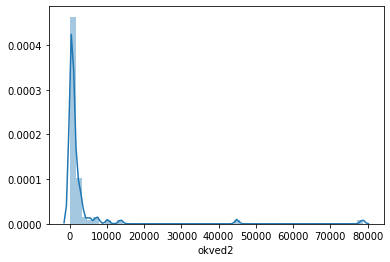

In [13]:
sns.distplot(data_info['okved2'].value_counts())

In [162]:
# Какое количество отраслей соответствует каждой компании
data_info_gr = data_info.groupby('hash_inn')['okved2'].count().reset_index()

In [163]:
data_info_gr.describe()

,hash_inn,okved2
count,240069.000000,240069.0
mean,130236.418734,1.0
std,75201.512046,0.0
min,0.000000,1.0
25%,65170.000000,1.0
50%,130169.000000,1.0
75%,195380.000000,1.0
max,260515.000000,1.0


In [164]:
data_pays_gr = data_pays.groupby(['hash_inn_kt','week'])[['sum']].sum().reset_index()

In [165]:
data_pays_gr.head(10)

,hash_inn_kt,week,sum
0,0,1,41035.224
1,0,2,31409.348
2,0,3,39972.628
3,0,4,2685.492
4,0,5,3634.288
5,0,6,44230.580
6,0,7,79.600
7,0,8,157.420
8,0,9,8609.956
9,0,10,18779.152


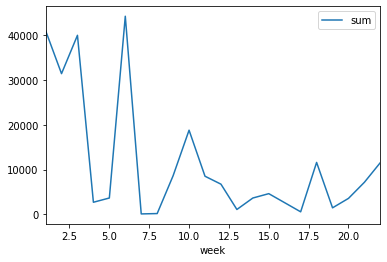

In [166]:
data_pays_gr[data_pays_gr['hash_inn_kt']==0][['week','sum']].set_index('week').plot()

#### Объединим таблички

In [167]:
data = data_pays.merge(data_info, left_on='hash_inn_kt', right_on='hash_inn', how='inner')

data.rename({'okved2':'kt_okved2', 'region':'kt_region', 'is_public':'kt_is_public'}, inplace=True, axis=1)

data = data.merge(data_info, left_on='hash_inn_dt', right_on='hash_inn', how='inner')

data.rename({'okved2':'dt_okved2', 'region':'dt_region', 'is_public':'dt_is_public'}, inplace=True, axis=1)

In [168]:
data.head()

,hash_inn_kt,hash_inn_dt,week,count,sum,hash_inn_x,kt_okved2,kt_region,kt_is_public,hash_inn_y,dt_okved2,dt_region,dt_is_public
0,0,0,1,4,38399.6,0,-1,84,False,0,-1,84,False
1,0,0,5,2,399.6,0,-1,84,False,0,-1,84,False
2,0,0,7,2,79.6,0,-1,84,False,0,-1,84,False
3,0,0,9,2,239.6,0,-1,84,False,0,-1,84,False
4,0,0,12,2,79.6,0,-1,84,False,0,-1,84,False


In [169]:
data.drop(['hash_inn_x','hash_inn_y'], inplace=True, axis=1)

In [170]:
data.head()

,hash_inn_kt,hash_inn_dt,week,count,sum,kt_okved2,kt_region,kt_is_public,dt_okved2,dt_region,dt_is_public
0,0,0,1,4,38399.6,-1,84,False,-1,84,False
1,0,0,5,2,399.6,-1,84,False,-1,84,False
2,0,0,7,2,79.6,-1,84,False,-1,84,False
3,0,0,9,2,239.6,-1,84,False,-1,84,False
4,0,0,12,2,79.6,-1,84,False,-1,84,False


In [171]:
(data['kt_is_public']&data['dt_is_public']).value_counts()

False    2887808
True     2542340
dtype: int64

In [172]:
data[(data['kt_okved2']==-1)&(data['dt_okved2']!=-1)].shape

(1129082, 11)

In [173]:
data[(data['kt_okved2']!=-1)&(data['dt_okved2']==-1)].shape

(1176160, 11)

In [174]:
data.shape

(5430148, 11)

In [175]:
test_inn = set(list(data_info[data_info['okved2']==-1]['hash_inn']))

Сколько из них не фигурируют в качестве получателей платежей, сколько не фигурируют в качестве отправителей, и все ли вообще встречаются в датасете:

In [28]:
# нет в отправителях
kt_inn = set(list(data[data['hash_inn_kt'].isin(test_inn)]['hash_inn_kt']))
# нет в получателях
dt_inn = set(list(data[data['hash_inn_dt'].isin(test_inn)]['hash_inn_dt']))

len(test_inn.difference(kt_inn)), len(test_inn.difference(dt_inn)), len(test_inn.difference(kt_inn.union(dt_inn)))

(28688, 16610, 0)

In [29]:
#### 1. Выделим те строки, где известны отрасли и отправителя, и получателя платежа. Поработаем с ними.

#### Преобразуем датасет таким образом, чтобы ИНН был только в одном столбце. В случае, когда компания является отправителем платежа, оставим сумму отрицательной (умножим на -1). А когда получателем - положительной.

In [30]:
data = load_from_pickle("data/data.pkl")

print(data.shape)
data = data.dropna()
print(data.shape)

(5430148, 11)
(5429025, 11)


In [31]:
for col in data.columns:
    print(col)

hash_inn_kt
hash_inn_dt
week
count
sum
kt_okved2
kt_region
kt_is_public
dt_okved2
dt_region
dt_is_public


In [32]:
data1 = data
data2 = data.copy()

In [33]:
d1 = {'hash_inn_kt':'source',
      'hash_inn_dt':'destination',
      'kt_okved2':'source_class',
      'dt_okved2':'destination_class',
      'kt_region':'source_region',
      'dt_region':'destination_region',
      'kt_is_public':'source_is_public',
      'dt_is_public':'destination_is_public'}

d2 = {'hash_inn_dt':'source',
      'hash_inn_kt':'destination',
      'dt_okved2':'source_class',
      'kt_okved2':'destination_class',
      'dt_region':'source_region',
      'kt_region':'destination_region',
      'dt_is_public':'source_is_public',
      'kt_is_public':'destination_is_public'}

data1.rename(d1, inplace=True, axis=1)
data2.rename(d2, inplace=True, axis=1)

data1['sum'] = -1 * data1['sum']

In [34]:
data1.shape, data2.shape

((5429025, 11), (5429025, 11))

In [35]:
data = data1.append(data2, sort=True)
data.shape

(10858050, 11)

In [36]:
data.head()

,count,destination,destination_class,destination_is_public,destination_region,source,source_class,source_is_public,source_region,sum,week
0,4,0,-1,False,84,0,-1,False,84,-38399.6,1
1,2,0,-1,False,84,0,-1,False,84,-399.6,5
2,2,0,-1,False,84,0,-1,False,84,-79.6,7
3,2,0,-1,False,84,0,-1,False,84,-239.6,9
4,2,0,-1,False,84,0,-1,False,84,-79.6,12


In [37]:
data = data[['source', 'destination', 
             'week', 'count', 'sum', 
             'source_region', 'destination_region', 
             'destination_class', 'destination_is_public',
             'source_class', 'source_is_public']]

data.shape

(10858050, 11)

In [38]:
data['source_is_public'].value_counts()

True     7388485
False    3469565
Name: source_is_public, dtype: int64

In [39]:
save_to_pickle(data, "data/data.pkl")

### Построим графики

In [3]:
data = load_from_pickle("data/data.pkl")

In [4]:
groups = data.groupby(['source_class','week'])['sum'].agg(['sum','mean']).reset_index()
groups['mean'] = groups.groupby(['source_class'])['sum'].transform(np.mean)
groups['diff'] = groups['sum'] - groups['mean'] 

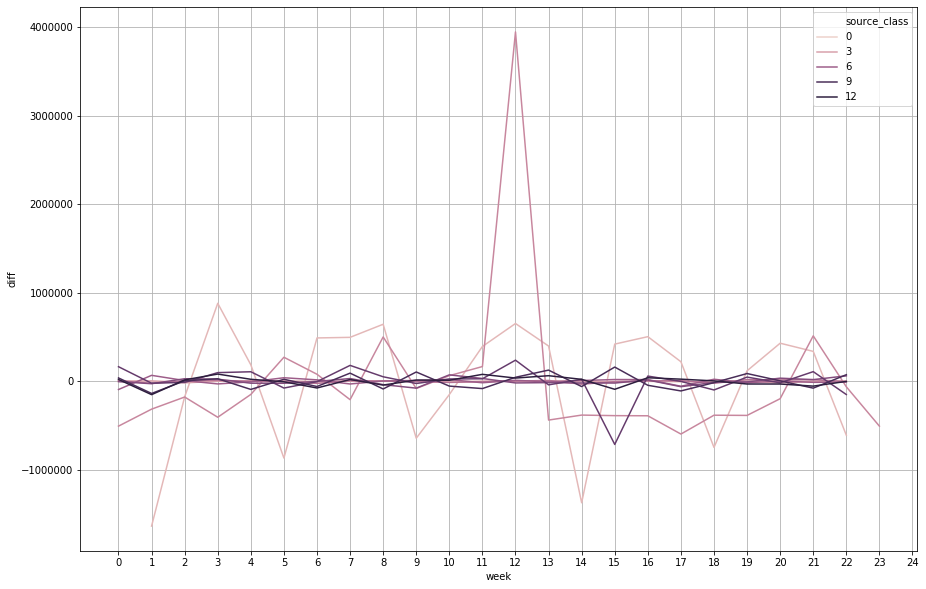

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(np.arange(0, 80, 1))
plt.grid()
sns.lineplot(x='week', y='diff', data = groups[(groups['source_class']>0)&(groups['source_class']<=10)], hue='source_class', ax=ax)

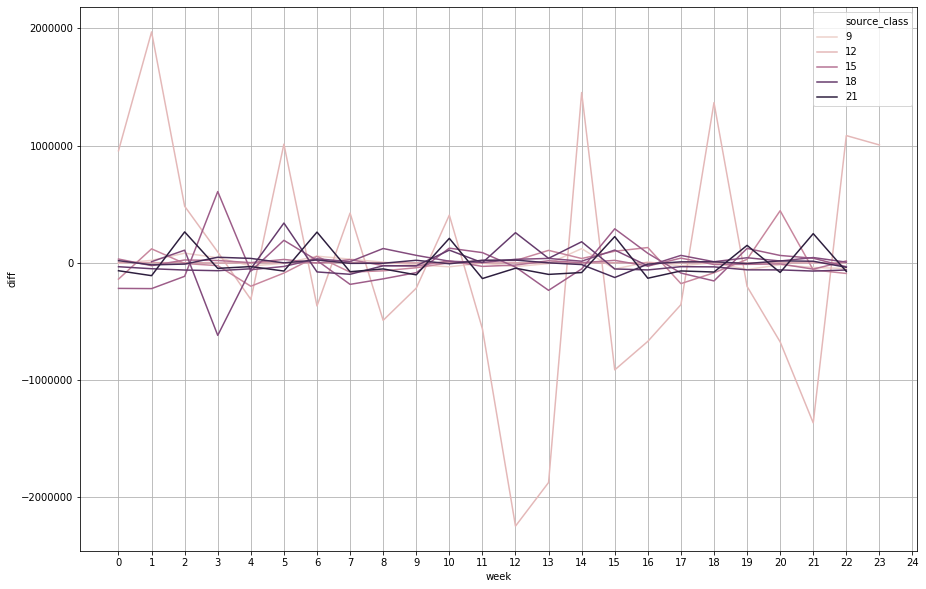

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(np.arange(0, 80, 1))
plt.grid()
sns.lineplot(x='week', y='diff', data = groups[(groups['source_class']>10)&(groups['source_class']<=20)], hue='source_class', ax=ax)

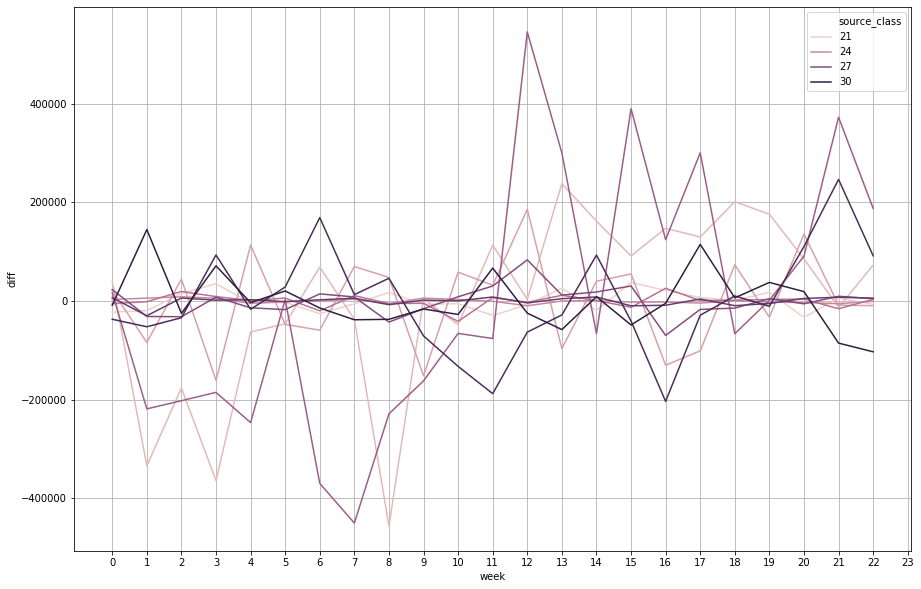

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(np.arange(0, 80, 1))
plt.grid()
sns.lineplot(x='week', y='diff', data = groups[(groups['source_class']>20)&(groups['source_class']<=30)], hue='source_class', ax=ax)

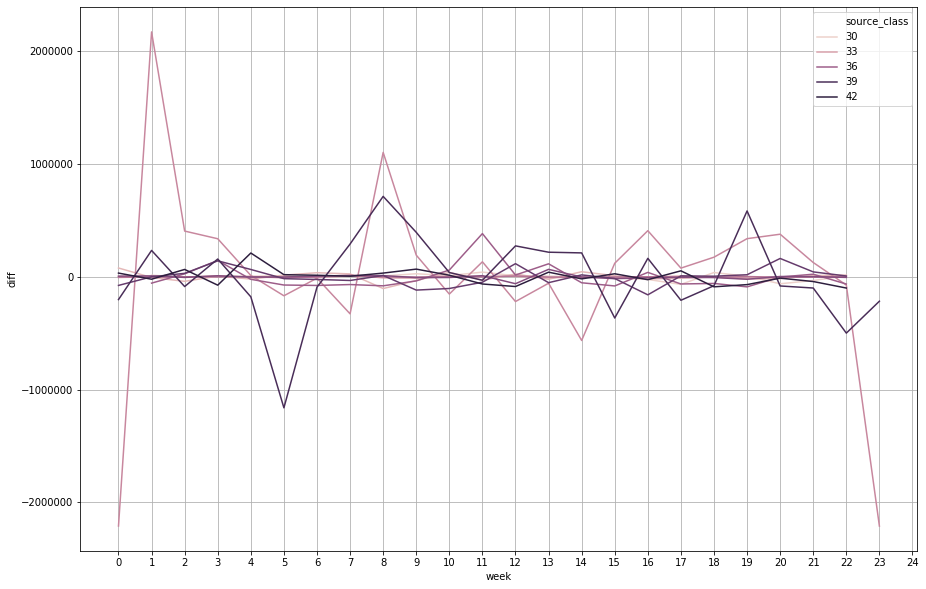

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(np.arange(0, 80, 1))
plt.grid()
sns.lineplot(x='week', y='diff', data = groups[(groups['source_class']>30)&(groups['source_class']<=40)], hue='source_class', ax=ax)

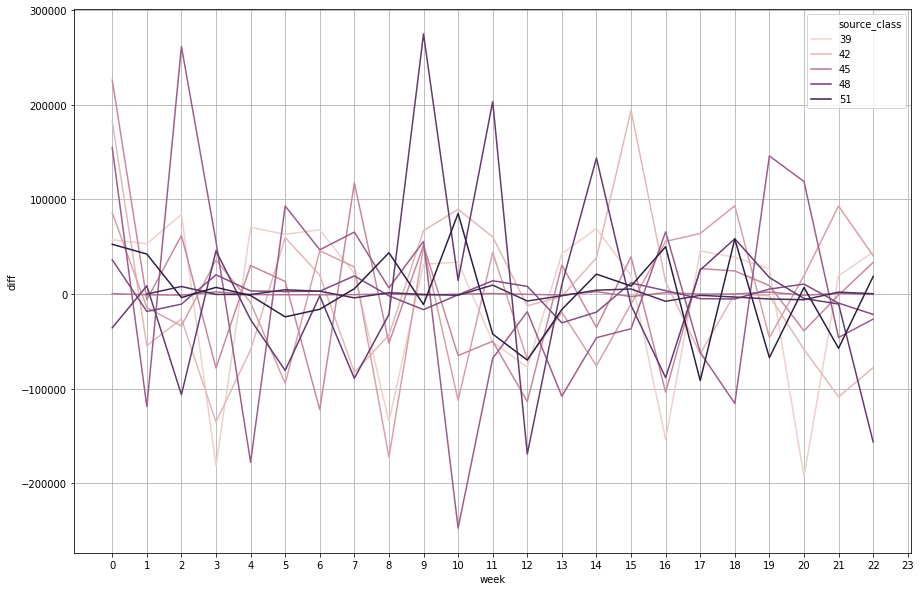

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(np.arange(0, 80, 1))
plt.grid()
sns.lineplot(x='week', y='diff', data = groups[(groups['source_class']>40)&(groups['source_class']<=50)], hue='source_class', ax=ax)

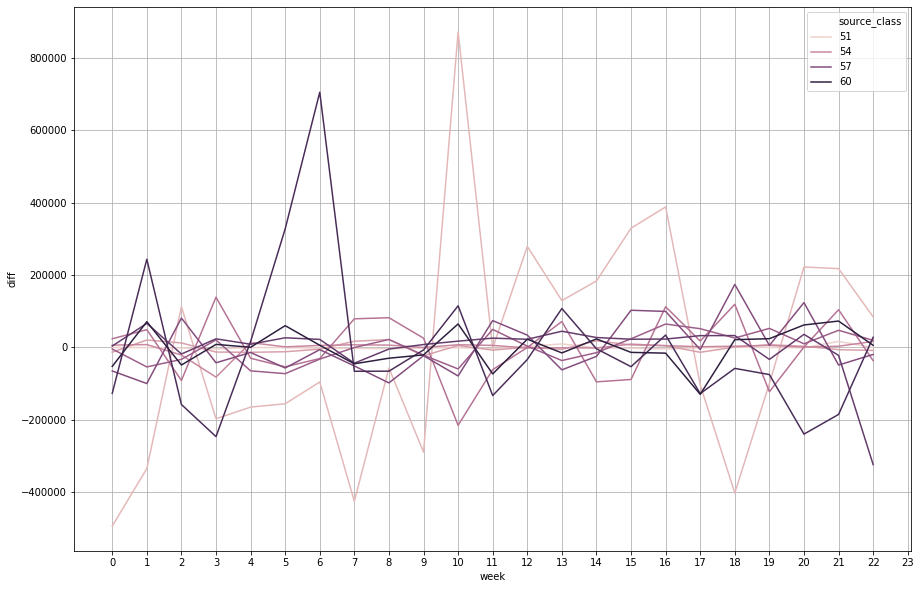

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(np.arange(0, 80, 1))
plt.grid()
sns.lineplot(x='week', y='diff', data = groups[(groups['source_class']>50)&(groups['source_class']<=60)], hue='source_class', ax=ax)

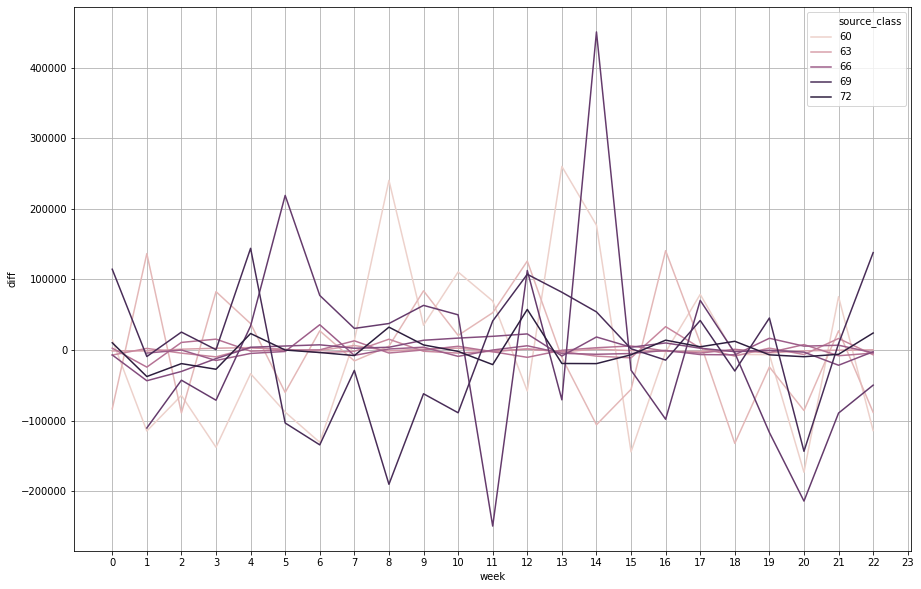

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(np.arange(0, 80, 1))
plt.grid()
sns.lineplot(x='week', y='diff', data = groups[(groups['source_class']>60)&(groups['source_class']<=70)], hue='source_class', ax=ax)

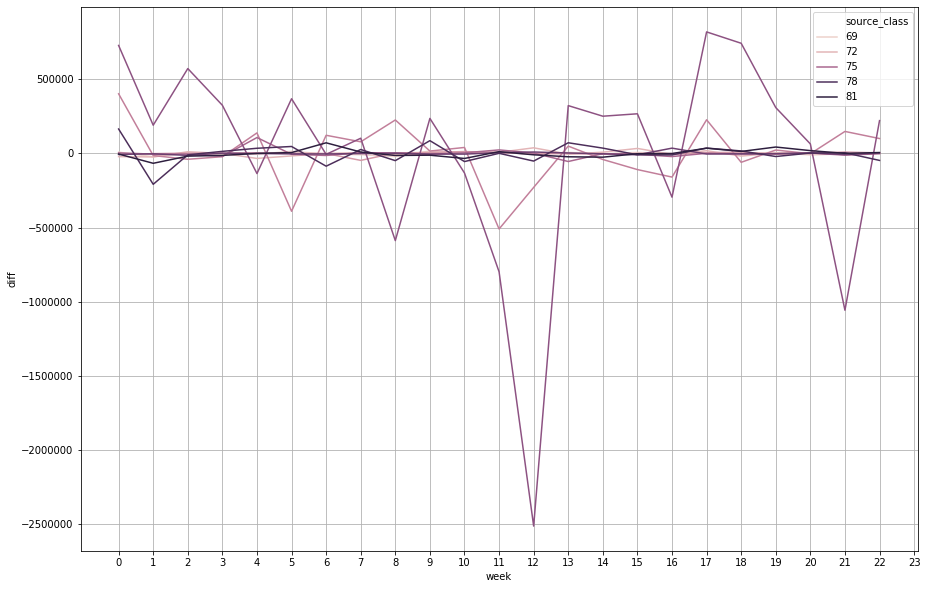

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(np.arange(0, 80, 1))
plt.grid()
sns.lineplot(x='week', y='diff', data = groups[(groups['source_class']>70)&(groups['source_class']<=80)], hue='source_class', ax=ax)

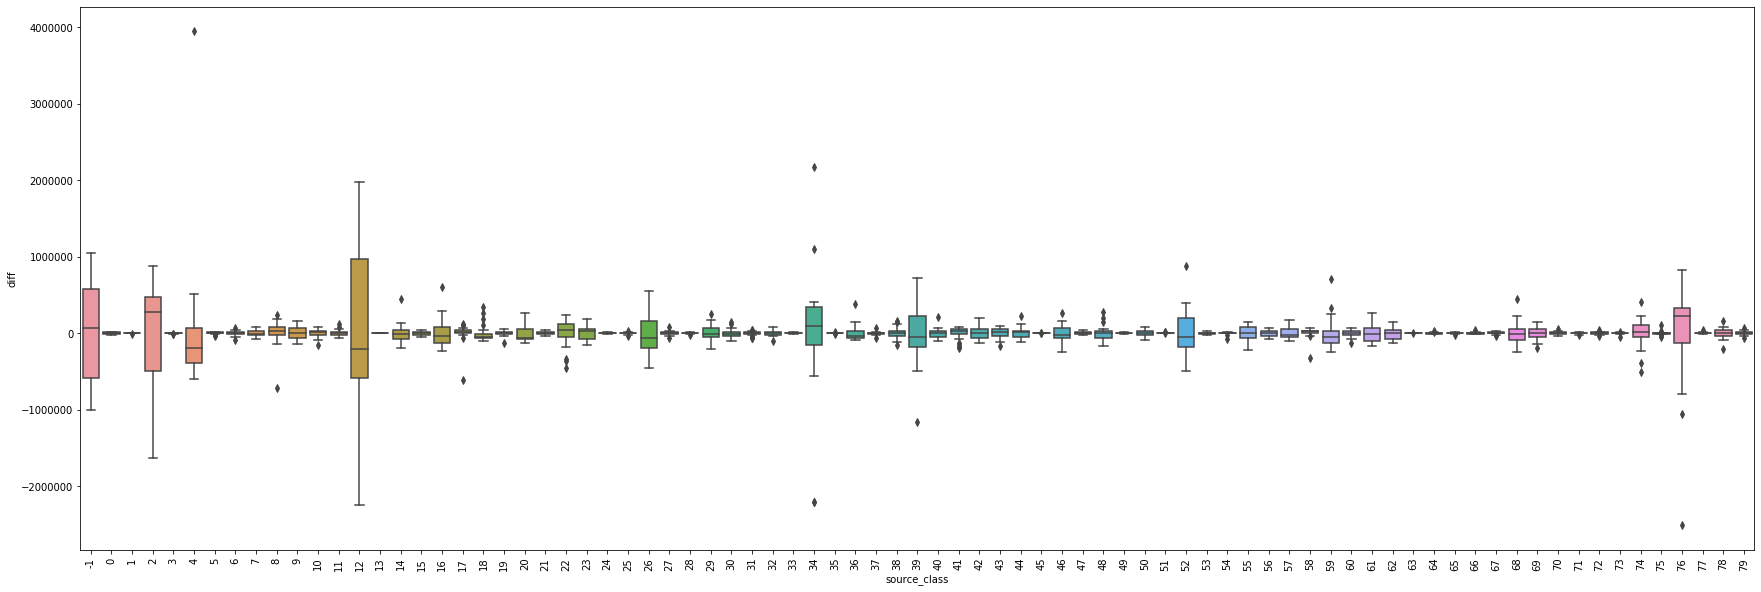

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
plt.xticks(rotation='vertical')
sns.boxplot(x="source_class", y="diff", data=groups, ax=ax)

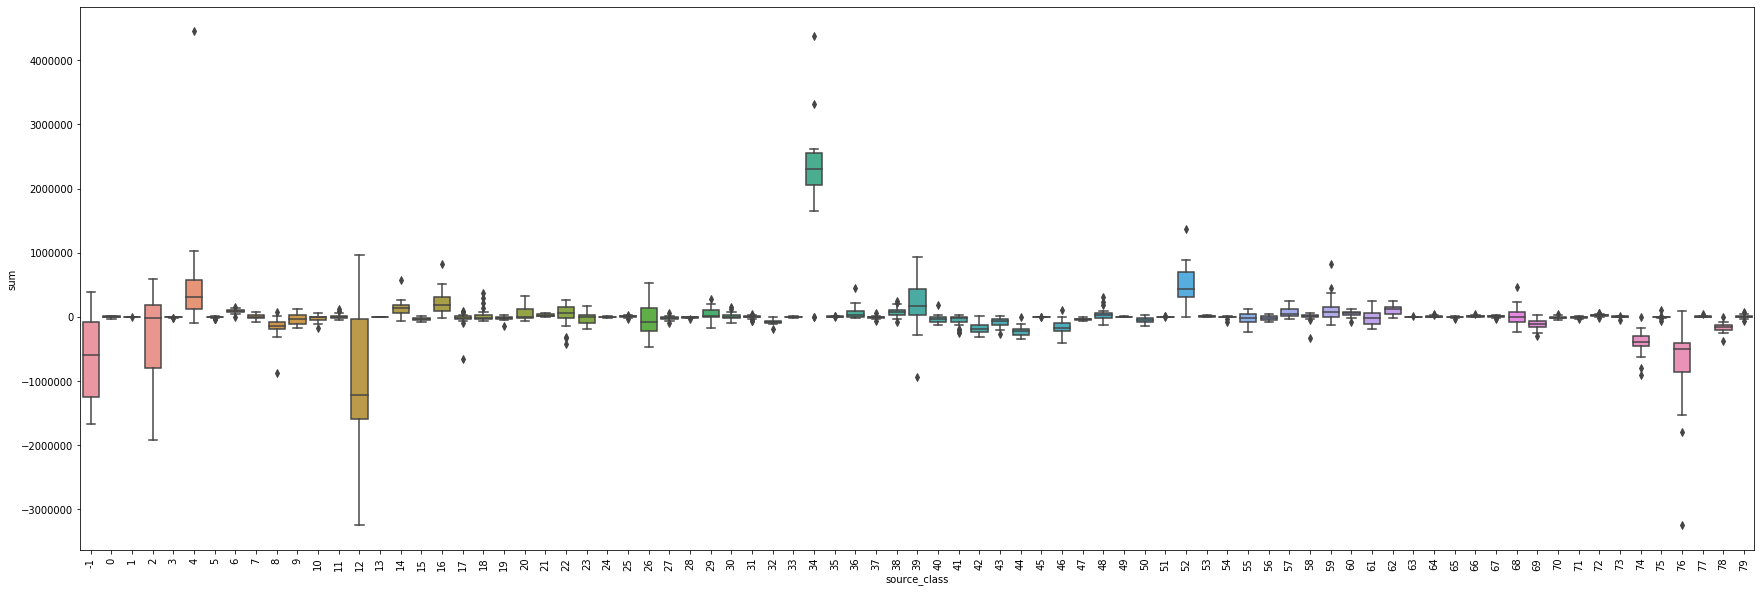

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
plt.xticks(rotation='vertical')
sns.boxplot(x="source_class", y="sum", data=groups, ax=ax)

In [15]:
data.head()

,source,destination,week,count,sum,source_region,destination_region,destination_class,destination_is_public,source_class,source_is_public
0,0,0,1,4,-38399.6,84,84,-1,False,-1,False
1,0,0,5,2,-399.6,84,84,-1,False,-1,False
2,0,0,7,2,-79.6,84,84,-1,False,-1,False
3,0,0,9,2,-239.6,84,84,-1,False,-1,False
4,0,0,12,2,-79.6,84,84,-1,False,-1,False


### Создадим датасеты

In [126]:
def get_nlargest_classes(arr, n):
    lst = pd.Series(arr)
    lst = lst[lst>0]
    lst = lst.nlargest(n)
    lst = lst.index.values.tolist()
    # padding to n elements with -1
    lst += [-1] * (n - len(lst))
    return lst

def get_nlargest_dest_classes(arr, n):
    lst = arr[arr<0]
    lst = np.abs(lst)
    lst = pd.Series(lst)
    lst = lst.nlargest(n)
    lst = lst.index.values.tolist()
    # padding to n elements with -1
    lst += [-1] * (n - len(lst))
    return lst

def pos_count(arr):
    arr = np.array(arr)
    return len(arr[arr>0])

def neg_count(arr):
    arr = np.array(arr)
    return len(arr[arr<0])

def nonzero_count(arr):
    arr = np.array(arr)
    return len(arr[arr!=0])

def pos_sum(arr):
    arr = np.array(arr)
    return np.sum(arr[arr>0])

def neg_sum(arr):
    arr = np.array(arr)
    arr = np.abs(arr)
    return np.sum(arr[arr<0])


def create_dataset():
    # Первый датасет. В нем вычислим общие характеристики компаний, 
    # а также числовые характеристики трат/поступлений в разных разрезах (по неделям, отраслям, регионам)
    data = load_from_pickle("data/data.pkl")
    inn = data['source'].unique()
    dataset = pd.DataFrame(index = inn)
    dataset['inn'] = inn
    
    data_pos_grouped_by_src = data[data['sum']>0].groupby(['source'])['sum']
    data_neg_grouped_by_src = data[data['sum']<0].groupby(['source'])['sum']
    
    dataset['src_sum_max'] = data.groupby(['source'])['sum'].max()
    dataset['src_sum_min'] = data.groupby(['source'])['sum'].min()
    dataset['src_sum_dev'] = dataset['src_sum_max'] - dataset['src_sum_min']
    
    dataset['src_pos_sum_mean'] = data_pos_grouped_by_src.mean()
    dataset['src_pos_sum_median'] = data_pos_grouped_by_src.median()
    dataset['src_neg_sum_mean'] = data_neg_grouped_by_src.mean()
    dataset['src_neg_sum_median'] = data_neg_grouped_by_src.median()
    
    dataset['src_pos_week_sum_mean'] = pd.pivot_table(data[data['sum']>0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).mean(axis=1)
    dataset['src_pos_week_sum_median'] = pd.pivot_table(data[data['sum']>0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.median, fill_value=0).median(axis=1)
    dataset['src_neg_week_sum_mean'] = pd.pivot_table(data[data['sum']<0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).mean(axis=1)
    dataset['src_neg_week_sum_median'] = pd.pivot_table(data[data['sum']<0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.median, fill_value=0).median(axis=1)   
    
    dataset['src_pos_week_sum_meanvar'] = pd.pivot_table(data[data['sum']>0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).var(axis=1)
    dataset['src_pos_week_sum_meanstd'] = pd.pivot_table(data[data['sum']>0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).std(axis=1)
    dataset['src_neg_week_sum_meanvar'] = pd.pivot_table(data[data['sum']<0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).var(axis=1)
    dataset['src_neg_week_sum_meanstd'] = pd.pivot_table(data[data['sum']<0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).std(axis=1)   
    
    
    dataset['src_weeks_count'] = pd.pivot_table(data[data['sum']!=0], values='sum', index=['source'],
                                columns=['week'], aggfunc='count', fill_value=0).count(axis=1) 

    dataset['src_pos_sum_var'] = data_pos_grouped_by_src.var()
    dataset['src_pos_sum_std'] = data_pos_grouped_by_src.std()
    dataset['src_pos_sum_skew'] = data_pos_grouped_by_src.apply(skew)
    dataset['src_pos_sum_kurt'] = data_pos_grouped_by_src.apply(kurtosis)
    
    dataset['src_neg_sum_var'] = data_neg_grouped_by_src.var()
    dataset['src_neg_sum_std'] = data_neg_grouped_by_src.std()
    dataset['src_neg_sum_skew'] = data_neg_grouped_by_src.apply(skew)
    dataset['src_neg_sum_kurt'] = data_neg_grouped_by_src.apply(kurtosis)
    
    dataset['src_pos_sum_count'] = data[data['sum']>0].groupby(['source'])['count'].sum()
    dataset['src_neg_sum_count'] = data[data['sum']<0].groupby(['source'])['count'].sum()
    
    dataset['src_pos_dest_nunique'] = data[data['sum']>0].groupby(['source'])['destination'].nunique()
    dataset['src_neg_dest_nunique'] = data[data['sum']<0].groupby(['source'])['destination'].nunique()
    
    data['same_region'] = data['source_region']==data['destination_region']
    data['same_region'] = data['same_region'].astype(int)
    data['self_pay'] = data['source']==data['destination']
    data['self_pay'] = data['self_pay'].astype(int)
    data['in'] = data['sum'].apply(lambda s: 1 if s>0 else 0)
    
    data['self_pay_sum'] = 0
    data.loc[data['self_pay']==1, 'self_pay_sum'] = data.loc[data['self_pay']==1, 'sum']
    dataset['src_self_pay_sum_rate'] = data.groupby(['source'])['self_pay_sum'].sum() / (data.groupby(['source'])['sum'].sum() + 1)
    
    dataset['src_in_rate'] = dataset['src_pos_sum_count'] / (dataset['src_pos_sum_count'] + dataset['src_neg_sum_count'] + 1)
    
    dataset['src_in_sum'] = data.groupby(['source'])['sum'].apply(pos_sum)
    dataset['src_out_sum'] = data.groupby(['source'])['sum'].apply(neg_sum)
    dataset['src_in_sum_rate'] = dataset['src_in_sum'] / (dataset['src_in_sum'] + dataset['src_out_sum'] + 1)
    
    dataset['src_same_region_rate'] = data.groupby(['source'])['same_region'].mean()
    dataset['src_self_pay_rate'] = data.groupby(['source'])['self_pay'].mean()

    dataset['src_cnt_sum'] = data.groupby(['source'])['count'].sum()

    
    pivot_class_sums = pd.pivot_table(data, values='sum', index=['source'],
                                      columns=['destination_class'], aggfunc=np.sum, fill_value=0)
    
    pivot_class_counts = pd.pivot_table(data, values='count', index=['source'],
                                        columns=['destination_class'], aggfunc=np.sum, fill_value=0)
    
    pivot_week_sums = pd.pivot_table(data, values='sum', index=['source'],
                                     columns=['week'], aggfunc=np.sum, fill_value=0)
    pivot_week_sums.columns = ['week_sum'+str(w) for w in pivot_week_sums.columns]
    
    pivot_week_counts = pd.pivot_table(data, values='count', index=['source'],
                                       columns=['week'], aggfunc=np.sum, fill_value=0)
    pivot_week_counts.columns = ['week_count'+str(w) for w in pivot_week_counts.columns]
    
    pivot_week_region = pd.pivot_table(data, values='same_region', index=['source'],
                    columns=['week'], aggfunc=np.sum, fill_value=0)
    pivot_week_region.columns = ['week_region'+str(w) for w in pivot_week_region.columns]
    
    pivot_week_selfpay = pd.pivot_table(data, values='self_pay', index=['source'],
                    columns=['week'], aggfunc=np.sum, fill_value=0)
    pivot_week_selfpay.columns = ['week_selfpay'+str(w) for w in pivot_week_selfpay.columns]
    
    pivot_class_sums = pivot_class_sums.sub(pivot_class_sums.mean(axis=1), axis=0).div(pivot_class_sums.std(axis=1), axis=0)
    pivot_class_counts = pivot_class_counts.sub(pivot_class_counts.mean(axis=1), axis=0).div(pivot_class_counts.std(axis=1), axis=0)
    pivot_week_sums = pivot_week_sums.sub(pivot_week_sums.mean(axis=1), axis=0).div(pivot_week_sums.std(axis=1), axis=0)
    pivot_week_counts = pivot_week_counts.sub(pivot_week_counts.mean(axis=1), axis=0).div(pivot_week_counts.std(axis=1), axis=0)
    pivot_week_region = pivot_week_region.sub(pivot_week_region.mean(axis=1), axis=0).div(pivot_week_region.std(axis=1), axis=0)
    pivot_week_selfpay = pivot_week_selfpay.sub(pivot_week_selfpay.mean(axis=1), axis=0).div(pivot_week_selfpay.std(axis=1), axis=0)
    
    pivot_class_sums.columns = ['class_sum'+str(w) for w in pivot_class_sums.columns]
    dataset = dataset.join(pivot_class_sums)
    
    pivot_class_counts.columns = ['class_count'+str(w) for w in pivot_class_counts.columns]
    dataset = dataset.join(pivot_class_counts)
    
    dataset = dataset.join(pivot_week_sums)
    
    dataset = dataset.join(pivot_week_counts)
    
    dataset = dataset.join(pivot_week_region)
    
    dataset = dataset.join(pivot_week_selfpay)
    
    dataset['source_class'] = data.groupby('source')['source_class'].first()
    
    return dataset



def create_dataset_categorical():
    # Второй датасет. В нем вычислим общие характеристики компаний, 
    # а также категориальные характеристики трат/поступлений в разных разрезах (по неделям, отраслям, регионам).
    # Найдем top-n отраслей, регионов, недель по входящим/исходящим платежам
    
    data = load_from_pickle("data/data.pkl")
    inn = data['source'].unique()
    dataset = pd.DataFrame(index = inn)
    dataset['inn'] = inn
    
    data_pos_grouped_by_src = data[data['sum']>0].groupby(['source'])['sum']
    data_neg_grouped_by_src = data[data['sum']<0].groupby(['source'])['sum']
    
    dataset['src_sum_max'] = data.groupby(['source'])['sum'].max()
    dataset['src_sum_min'] = data.groupby(['source'])['sum'].min()
    dataset['src_sum_dev'] = dataset['src_sum_max'] - dataset['src_sum_min']
    
    dataset['src_pos_sum_mean'] = data_pos_grouped_by_src.mean()
    dataset['src_pos_sum_median'] = data_pos_grouped_by_src.median()
    dataset['src_neg_sum_mean'] = data_neg_grouped_by_src.mean()
    dataset['src_neg_sum_median'] = data_neg_grouped_by_src.median()
    
    dataset['src_pos_week_sum_mean'] = pd.pivot_table(data[data['sum']>0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).mean(axis=1)
    dataset['src_pos_week_sum_median'] = pd.pivot_table(data[data['sum']>0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.median, fill_value=0).median(axis=1)
    dataset['src_neg_week_sum_mean'] = pd.pivot_table(data[data['sum']<0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).mean(axis=1)
    dataset['src_neg_week_sum_median'] = pd.pivot_table(data[data['sum']<0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.median, fill_value=0).median(axis=1)   
    
    dataset['src_pos_week_sum_meanvar'] = pd.pivot_table(data[data['sum']>0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).var(axis=1)
    dataset['src_pos_week_sum_meanstd'] = pd.pivot_table(data[data['sum']>0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).std(axis=1)
    dataset['src_neg_week_sum_meanvar'] = pd.pivot_table(data[data['sum']<0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).var(axis=1)
    dataset['src_neg_week_sum_meanstd'] = pd.pivot_table(data[data['sum']<0], values='sum', index=['source'],
                                columns=['week'], aggfunc=np.mean, fill_value=0).std(axis=1)   
    
    
    dataset['src_weeks_count'] = pd.pivot_table(data[data['sum']!=0], values='sum', index=['source'],
                                columns=['week'], aggfunc='count', fill_value=0).count(axis=1) 

    dataset['src_pos_sum_var'] = data_pos_grouped_by_src.var()
    dataset['src_pos_sum_std'] = data_pos_grouped_by_src.std()
    dataset['src_pos_sum_skew'] = data_pos_grouped_by_src.apply(skew)
    dataset['src_pos_sum_kurt'] = data_pos_grouped_by_src.apply(kurtosis)
    
    dataset['src_neg_sum_var'] = data_neg_grouped_by_src.var()
    dataset['src_neg_sum_std'] = data_neg_grouped_by_src.std()
    dataset['src_neg_sum_skew'] = data_neg_grouped_by_src.apply(skew)
    dataset['src_neg_sum_kurt'] = data_neg_grouped_by_src.apply(kurtosis)
    
    dataset['src_pos_sum_count'] = data[data['sum']>0].groupby(['source'])['count'].sum()
    dataset['src_neg_sum_count'] = data[data['sum']<0].groupby(['source'])['count'].sum()
    
    dataset['src_pos_dest_nunique'] = data[data['sum']>0].groupby(['source'])['destination'].nunique()
    dataset['src_neg_dest_nunique'] = data[data['sum']<0].groupby(['source'])['destination'].nunique()
    
    data['same_region'] = data['source_region']==data['destination_region']
    data['same_region'] = data['same_region'].astype(int)
    data['self_pay'] = data['source']==data['destination']
    data['self_pay'] = data['self_pay'].astype(int)
    data['in'] = data['sum'].apply(lambda s: 1 if s>0 else 0)
    
    data['self_pay_sum'] = 0
    data.loc[data['self_pay']==1, 'self_pay_sum'] = data.loc[data['self_pay']==1, 'sum']
    dataset['src_self_pay_sum_rate'] = data.groupby(['source'])['self_pay_sum'].sum() / (data.groupby(['source'])['sum'].sum() + 1)
    
    dataset['src_in_rate'] = dataset['src_pos_sum_count'] / (dataset['src_pos_sum_count'] + dataset['src_neg_sum_count'] + 1)
    
    dataset['src_in_sum'] = data.groupby(['source'])['sum'].apply(pos_sum)
    dataset['src_out_sum'] = data.groupby(['source'])['sum'].apply(neg_sum)
    dataset['src_in_sum_rate'] = dataset['src_in_sum'] / (dataset['src_in_sum'] + dataset['src_out_sum'] + 1)
    
    dataset['src_same_region_rate'] = data.groupby(['source'])['same_region'].mean()
    dataset['src_self_pay_rate'] = data.groupby(['source'])['self_pay'].mean()

    dataset['src_cnt_sum'] = data.groupby(['source'])['count'].sum()

    print(1)
    
    pivot_class_pos_sums = pd.pivot_table(data[data['sum']>0], values='sum', index=['source'],
                    columns=['destination_class'], aggfunc=np.sum, fill_value=0)
    pivot_class_neg_sums = pd.pivot_table(data[data['sum']<0], values='sum', index=['source'],
                    columns=['destination_class'], aggfunc=np.sum, fill_value=0)
    print(2)
    
    pivot_class_pos_counts = pd.pivot_table(data[data['sum']>0], values='count', index=['source'],
                    columns=['destination_class'], aggfunc=np.sum, fill_value=0)
    pivot_class_neg_counts = pd.pivot_table(data[data['sum']<0], values='count', index=['source'],
                    columns=['destination_class'], aggfunc=np.sum, fill_value=0)
    print(3)
    
    pivot_week_pos_sums = pd.pivot_table(data[data['sum']>0], values='sum', index=['source'],
                    columns=['week'], aggfunc=np.sum, fill_value=0)
    pivot_week_neg_sums = pd.pivot_table(data[data['sum']<0], values='sum', index=['source'],
                    columns=['week'], aggfunc=np.sum, fill_value=0)
    print(4)
    
    pivot_week_pos_counts = pd.pivot_table(data[data['sum']>0], values='count', index=['source'],
                    columns=['week'], aggfunc=np.sum, fill_value=0)
    pivot_week_neg_counts = pd.pivot_table(data[data['sum']<0], values='count', index=['source'],
                    columns=['week'], aggfunc=np.sum, fill_value=0)
    
    pivot_region_sums = pd.pivot_table(data, values='sum', index=['source'],
                    columns=['destination_region'], aggfunc=np.sum, fill_value=0)
    print(5)
   
    largest_n = 10
    fillna_list = [-1 for i in range(0,largest_n)]
    
    pivot_class_pos_sums.apply(lambda a: get_nlargest_classes(a, 2), axis=1)
    
    dataset['largest_pos_sum_classes'] = pivot_class_pos_sums.apply(lambda a: get_nlargest_classes(a, largest_n), axis=1)
    dataset['largest_pos_sum_classes'] = dataset['largest_pos_sum_classes'].apply(lambda d: d if isinstance(d, list) else fillna_list)
    print(6)
    dataset['largest_pos_counts_classes'] = pivot_class_pos_counts.apply(lambda a: get_nlargest_classes(a, largest_n), axis=1)
    dataset['largest_pos_counts_classes'] = dataset['largest_pos_counts_classes'].apply(lambda d: d if isinstance(d, list) else fillna_list)
    print(7)
    dataset['largest_pos_sum_weeks'] = pivot_week_pos_sums.apply(lambda a: get_nlargest_classes(a, largest_n), axis=1)
    dataset['largest_pos_sum_weeks'] = dataset['largest_pos_sum_weeks'].apply(lambda d: d if isinstance(d, list) else fillna_list)
    print(8)
    dataset['largest_pos_counts_weeks'] = pivot_week_pos_counts.apply(lambda a: get_nlargest_classes(a, largest_n), axis=1)
    dataset['largest_pos_counts_weeks'] = dataset['largest_pos_counts_weeks'].apply(lambda d: d if isinstance(d, list) else fillna_list)
    print(9)
    
    dataset['largest_neg_sum_classes'] = pivot_class_neg_sums.apply(lambda a: get_nlargest_classes(a, largest_n), axis=1)
    dataset['largest_neg_sum_classes'] = dataset['largest_neg_sum_classes'].apply(lambda d: d if isinstance(d, list) else fillna_list)
    print(10)
    dataset['largest_neg_counts_classes'] = pivot_class_neg_counts.apply(lambda a: get_nlargest_classes(a, largest_n), axis=1)
    dataset['largest_neg_counts_classes'] = dataset['largest_neg_counts_classes'].apply(lambda d: d if isinstance(d, list) else fillna_list)
    print(11)
    dataset['largest_neg_sum_weeks'] = pivot_week_neg_sums.apply(lambda a: get_nlargest_classes(a, largest_n), axis=1)
    dataset['largest_neg_sum_weeks'] = dataset['largest_neg_sum_weeks'].apply(lambda d: d if isinstance(d, list) else fillna_list)
    print(12)
    dataset['largest_neg_counts_weeks'] = pivot_week_neg_counts.apply(lambda a: get_nlargest_classes(a, largest_n), axis=1)
    dataset['largest_neg_counts_weeks'] = dataset['largest_neg_counts_weeks'].apply(lambda d: d if isinstance(d, list) else fillna_list)
    print(13)
    
    dataset['largest_sum_regions'] = pivot_region_sums.apply(lambda a: get_nlargest_classes(a, largest_n), axis=1)
    dataset['largest_sum_regions'] = dataset['largest_sum_regions'].apply(lambda d: d if isinstance(d, list) else fillna_list)
    print(14)
    
    cols = ['largest_pos_sum_classes'+str(i) for i in range(1, len(dataset['largest_pos_sum_classes'][0]) + 1)]
    dataset[cols] = pd.DataFrame(dataset['largest_pos_sum_classes'].values.tolist(), index= dataset.index)
    dataset.drop('largest_pos_sum_classes', axis=1, inplace=True)

    cols = ['largest_pos_counts_classes'+str(i) for i in range(1, len(dataset['largest_pos_counts_classes'][0]) + 1)]
    dataset[cols] = pd.DataFrame(dataset['largest_pos_counts_classes'].values.tolist(), index= dataset.index)
    dataset.drop('largest_pos_counts_classes', axis=1, inplace=True)

    cols = ['largest_pos_sum_weeks'+str(i) for i in range(1, len(dataset['largest_pos_sum_weeks'][0]) + 1)]
    dataset[cols] = pd.DataFrame(dataset['largest_pos_sum_weeks'].values.tolist(), index= dataset.index)
    dataset.drop('largest_pos_sum_weeks', axis=1, inplace=True)

    cols = ['largest_pos_counts_weeks'+str(i) for i in range(1, len(dataset['largest_pos_counts_weeks'][0]) + 1)]
    dataset[cols] = pd.DataFrame(dataset['largest_pos_counts_weeks'].values.tolist(), index= dataset.index)
    dataset.drop('largest_pos_counts_weeks', axis=1, inplace=True)
    
   
    cols = ['largest_neg_sum_classes'+str(i) for i in range(1, len(dataset['largest_neg_sum_classes'][0]) + 1)]
    dataset[cols] = pd.DataFrame(dataset['largest_neg_sum_classes'].values.tolist(), index= dataset.index)
    dataset.drop('largest_neg_sum_classes', axis=1, inplace=True)

    cols = ['largest_neg_counts_classes'+str(i) for i in range(1, len(dataset['largest_neg_counts_classes'][0]) + 1)]
    dataset[cols] = pd.DataFrame(dataset['largest_neg_counts_classes'].values.tolist(), index= dataset.index)
    dataset.drop('largest_neg_counts_classes', axis=1, inplace=True)

    cols = ['largest_neg_sum_weeks'+str(i) for i in range(1, len(dataset['largest_neg_sum_weeks'][0]) + 1)]
    dataset[cols] = pd.DataFrame(dataset['largest_neg_sum_weeks'].values.tolist(), index= dataset.index)
    dataset.drop('largest_neg_sum_weeks', axis=1, inplace=True)

    cols = ['largest_neg_counts_weeks'+str(i) for i in range(1, len(dataset['largest_neg_counts_weeks'][0]) + 1)]
    dataset[cols] = pd.DataFrame(dataset['largest_neg_counts_weeks'].values.tolist(), index= dataset.index)
    dataset.drop('largest_neg_counts_weeks', axis=1, inplace=True)

    cols = ['largest_sum_regions'+str(i) for i in range(1, len(dataset['largest_sum_regions'][0]) + 1)]
    dataset[cols] = pd.DataFrame(dataset['largest_sum_regions'].values.tolist(), index= dataset.index)
    dataset.drop('largest_sum_regions', axis=1, inplace=True)

    dataset['source_class'] = data.groupby('source')['source_class'].first()
    
    return dataset

In [127]:
%%time
dataset = create_dataset()
save_to_pickle(dataset, "data/dataset2.pkl")
print(dataset.shape)

(240069, 296)
Wall time: 5min 26s


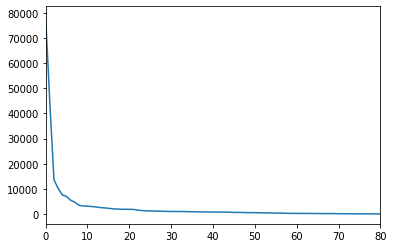

In [130]:
pd.DataFrame(dataset['source_class'].value_counts()).reset_index()['source_class'].plot()

In [117]:
%%time
dataset = create_dataset_categorical()
save_to_pickle(dataset, "data/dataset2_cat.pkl")
cat_features = dataset.columns[dataset.columns.str.startswith('largest_')]
print(dataset.shape)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
(240069, 128)
Wall time: 38min


## Прогнозирование (классификация)

### 1. Прогнозируем по первому датасету

In [16]:
%%time
dataset = load_from_pickle("data/dataset2.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=200, class_weight = "balanced_subsample", max_depth=20)
# clf = RandomForestClassifier(n_estimators=150, bootstrap=True, max_depth=10)
# clf = xgboost.XGBClassifier(n_estimators=200, max_depth=5, seed=2, subsample=0.55)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

(129132, 294) (32283, 294) (129132,) (32283,)
              precision    recall  f1-score   support

           0       0.15      0.09      0.11       163
           1       0.03      0.10      0.05        10
           2       0.10      0.22      0.13        18
           3       0.10      0.02      0.04       168
           4       0.39      0.39      0.39      1523
           5       0.10      0.04      0.06        50
           6       0.15      0.36      0.21       491
           7       0.06      0.02      0.03       130
           8       0.34      0.19      0.24       932
           9       0.08      0.01      0.02       377
          10       0.07      0.01      0.02       201
          11       0.08      0.41      0.13       570
          12       0.44      0.09      0.15      8983
          13       0.00      0.00      0.00        14
          14       0.49      0.28      0.35      2036
          15       0.09      0.17      0.12        87
          16       0.05      0.22  

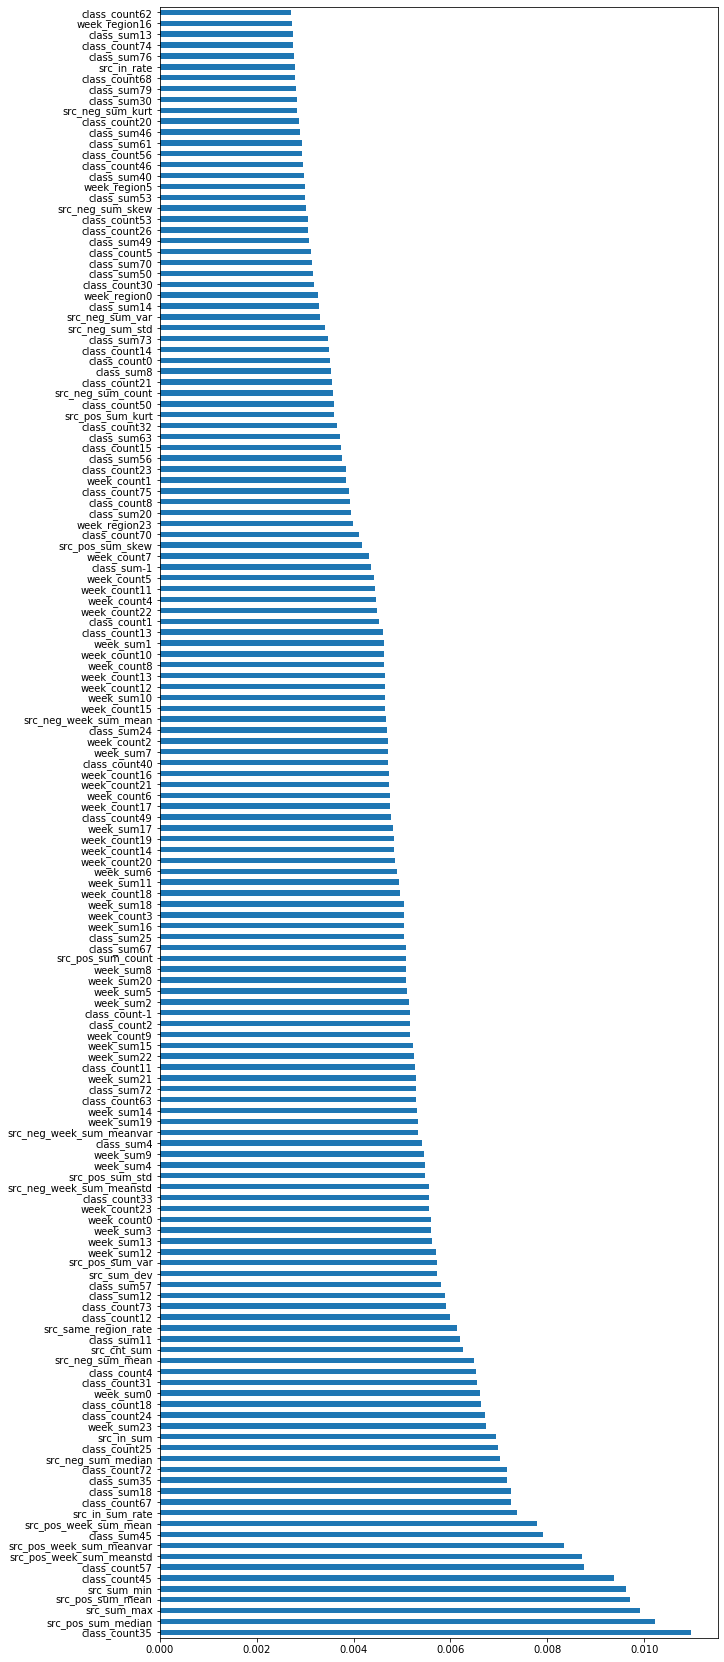

In [17]:
feature_importances = dict(zip(X_train.columns, clf.feature_importances_))
pd.Series(feature_importances).nlargest(150).plot(kind='barh', figsize=(10, 30))

In [18]:
pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))

0.7077235239353119


#### Попробуем откалибровать классификатор

In [133]:
%%time
model_calibrated = CalibratedClassifierCV(clf, cv=3, method='isotonic') # method : ‘sigmoid’ or ‘isotonic’
model_calibrated.fit(X_train, y_train)

pred = model_calibrated.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))
print(classification_report(y_test, model_calibrated.predict(X_test)))

0.7298009299788855
              precision    recall  f1-score   support

           0       0.58      0.04      0.08       163
           1       0.00      0.00      0.00        10
           2       1.00      0.11      0.20        18
           3       1.00      0.01      0.02       168
           4       0.54      0.28      0.37      1523
           5       0.33      0.02      0.04        50
           6       0.50      0.00      0.01       491
           7       0.00      0.00      0.00       130
           8       0.47      0.11      0.18       932
           9       0.00      0.00      0.00       377
          10       0.00      0.00      0.00       201
          11       0.67      0.09      0.16       570
          12       0.31      0.94      0.47      8983
          13       0.00      0.00      0.00        14
          14       0.33      0.32      0.33      2036
          15       0.00      0.00      0.00        87
          16       0.00      0.00      0.00       375
        

c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Откалиброванный классификатор совсем игнорирует многие классы - плохо.

In [20]:
# features = list(pd.Series(feature_importances).nlargest(30).index) + list(['inn','source_class'])
# dataset = dataset[features]

In [21]:
%%time
dataset = load_from_pickle("data/dataset2.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

features = list(pd.Series(feature_importances).nlargest(30).index) + list(['inn','source_class'])
dataset = dataset[features]

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=200, class_weight = "balanced_subsample", max_depth=20)
# clf = RandomForestClassifier(n_estimators=150, bootstrap=True, max_depth=10)
# clf = xgboost.XGBClassifier(n_estimators=200, max_depth=5, seed=2, subsample=0.55)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

(129132, 30) (32283, 30) (129132,) (32283,)
              precision    recall  f1-score   support

           0       0.06      0.04      0.05       163
           1       0.00      0.00      0.00        10
           2       0.05      0.22      0.08        18
           3       0.02      0.01      0.02       168
           4       0.38      0.43      0.40      1523
           5       0.00      0.02      0.00        50
           6       0.18      0.28      0.22       491
           7       0.03      0.02      0.02       130
           8       0.19      0.03      0.06       932
           9       0.05      0.01      0.01       377
          10       0.02      0.02      0.02       201
          11       0.09      0.36      0.15       570
          12       0.43      0.07      0.11      8983
          13       0.00      0.00      0.00        14
          14       0.32      0.20      0.24      2036
          15       0.01      0.08      0.02        87
          16       0.05      0.14    

In [24]:
%%time
dataset = load_from_pickle("data/dataset2.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

# features = list(pd.Series(feature_importances).nlargest(30).index) + list(['inn','source_class'])
dataset = dataset[features]

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = lightgbm.LGBMClassifier(max_depth = 5, 
                         n_estimators = 200,
                         objective = 'multiclass', 
                         class_weight = 'balanced',
                         random_state = 2)

clf.fit(X=X_train, y=y_train, 
        #categorical_feature=cat_features, 
        verbose=True)

print(classification_report(y_test, clf.predict(X_test)))
pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))

(129132, 30) (32283, 30) (129132,) (32283,)
              precision    recall  f1-score   support

           0       0.03      0.05      0.04       163
           1       0.00      0.00      0.00        10
           2       0.03      0.22      0.05        18
           3       0.02      0.05      0.03       168
           4       0.44      0.36      0.40      1523
           5       0.00      0.02      0.01        50
           6       0.19      0.29      0.23       491
           7       0.02      0.04      0.02       130
           8       0.16      0.06      0.08       932
           9       0.09      0.05      0.06       377
          10       0.03      0.06      0.04       201
          11       0.14      0.28      0.19       570
          12       0.68      0.03      0.06      8983
          13       0.00      0.00      0.00        14
          14       0.42      0.20      0.27      2036
          15       0.01      0.07      0.02        87
          16       0.07      0.11    

### 2. Прогнозируем по второму датасету

In [121]:
%%time
dataset = load_from_pickle("data/dataset2_cat.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']

cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = lightgbm.LGBMClassifier(max_depth = 7, 
                         n_estimators = 100,
                         objective = 'multiclass', 
                         class_weight = 'balanced',
                         random_state = 2)

clf.fit(X=X_train, y=y_train, 
        categorical_feature=cat_features, 
        verbose=True)

pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))
print(classification_report(y_test, clf.predict(X_test)))

(129132, 126) (32283, 126) (129132,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['largest_neg_counts_classes1', 'largest_neg_counts_classes10', 'largest_neg_counts_classes2', 'largest_neg_counts_classes3', 'largest_neg_counts_classes4', 'largest_neg_counts_classes5', 'largest_neg_counts_classes6', 'largest_neg_counts_classes7', 'largest_neg_counts_classes8', 'largest_neg_counts_classes9', 'largest_neg_counts_weeks1', 'largest_neg_counts_weeks10', 'largest_neg_counts_weeks2', 'largest_neg_counts_weeks3', 'largest_neg_counts_weeks4', 'largest_neg_counts_weeks5', 'largest_neg_counts_weeks6', 'largest_neg_counts_weeks7', 'largest_neg_counts_weeks8', 'largest_neg_counts_weeks9', 'largest_neg_sum_classes1', 'largest_neg_sum_classes10', 'largest_neg_sum_classes2', 'largest_neg_sum_classes3', 'largest_neg_sum_classes4', 'largest_neg_sum_classes5', 'largest_neg_sum_classes6', 'largest_neg_sum_cla

0.7602291572246751
              precision    recall  f1-score   support

           0       0.06      0.16      0.08       163
           1       0.00      0.00      0.00        10
           2       0.09      0.22      0.12        18
           3       0.05      0.09      0.06       168
           4       0.44      0.40      0.42      1523
           5       0.01      0.04      0.02        50
           6       0.24      0.36      0.29       491
           7       0.04      0.07      0.05       130
           8       0.30      0.28      0.29       932
           9       0.16      0.14      0.15       377
          10       0.07      0.19      0.10       201
          11       0.20      0.47      0.28       570
          12       0.70      0.09      0.15      8983
          13       0.00      0.00      0.00        14
          14       0.58      0.41      0.48      2036
          15       0.04      0.10      0.06        87
          16       0.10      0.17      0.12       375
        

In [122]:
# Посмотрим, что на тренировочном датасете

print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.30      0.82      0.44       652
           1       0.42      1.00      0.59        40
           2       0.35      1.00      0.52        72
           3       0.37      0.80      0.51       674
           4       0.60      0.50      0.54      6094
           5       0.23      0.97      0.38       200
           6       0.50      0.68      0.57      1965
           7       0.46      0.88      0.60       519
           8       0.54      0.43      0.48      3726
           9       0.58      0.56      0.57      1510
          10       0.26      0.78      0.39       805
          11       0.32      0.71      0.44      2280
          12       0.91      0.11      0.19     35935
          13       0.11      1.00      0.20        54
          14       0.80      0.48      0.60      8143
          15       0.35      0.93      0.51       349
          16       0.38      0.61      0.47      1498
          17       0.23    

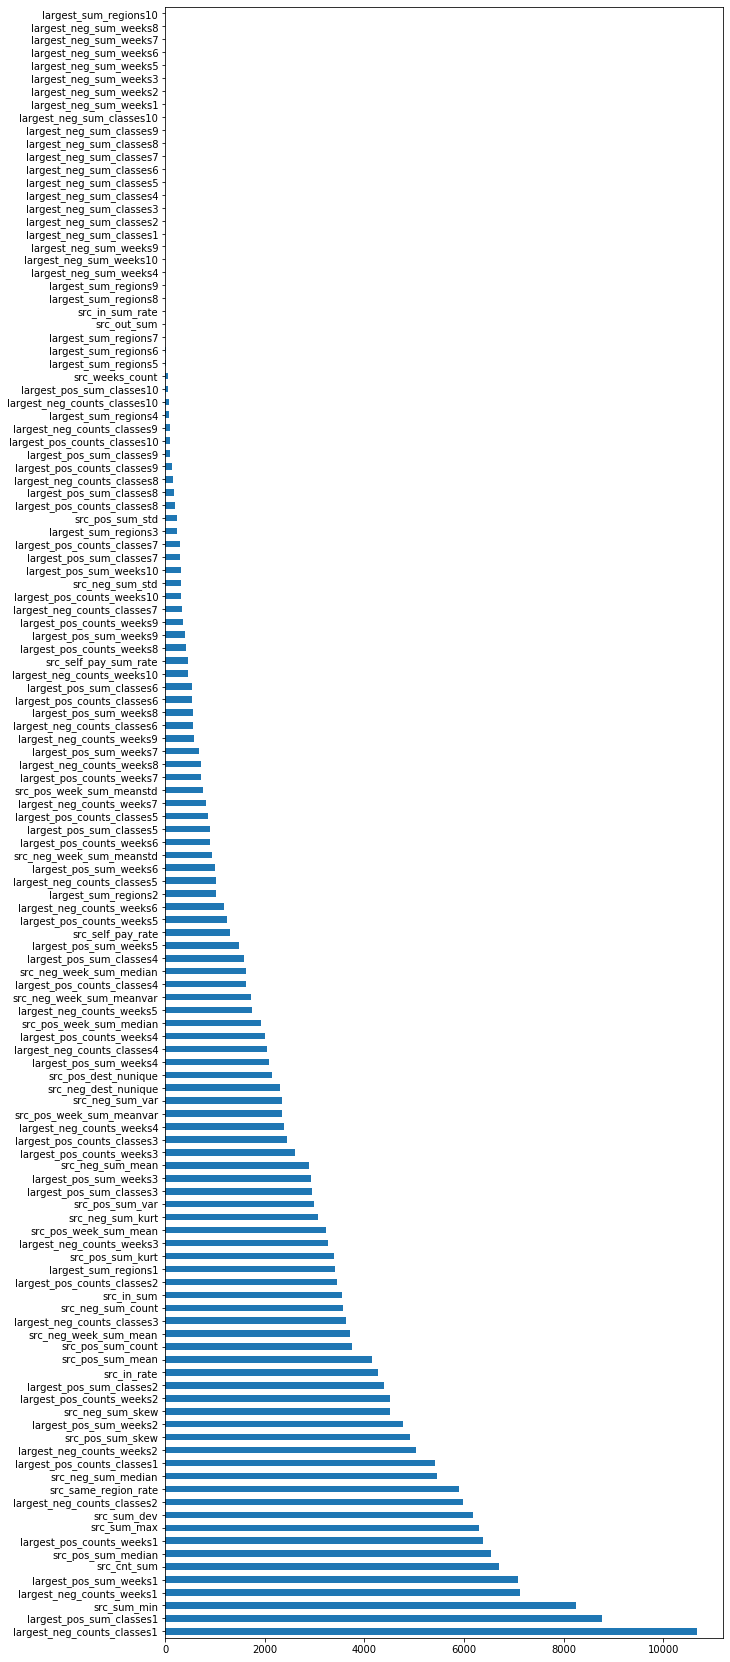

In [125]:
feature_importances = dict(zip(X_train.columns, clf.feature_importances_))
pd.Series(feature_importances).nlargest(150).plot(kind='barh', figsize=(10, 30))

### 3. Прогнозируем по второму датасету с добавлением признаков-кластеров

In [139]:
%%time
dataset = load_from_pickle("data/dataset2_cat.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

# Кластеризацию строим по числовым признакам из первого датасета (суммы платежей по неделям)
dataset_clast = load_from_pickle("data/dataset2.pkl")
dataset_clast = dataset_clast[dataset_clast['source_class']!=-1]
dataset_clast = dataset_clast.fillna(0)
cols = dataset_clast.columns[dataset_clast.columns.str.startswith('week_sum')]
dataset_clast = dataset_clast[dataset_clast['inn'].isin(list(dataset['inn']))]
tmp = dataset_clast[['inn']]
dataset_clast = dataset_clast[cols]
scaler_clast = StandardScaler()
dataset_clast = scaler_clast.fit_transform(dataset_clast)
clust = KMeans(n_clusters = 20, max_iter = 1000)
clust.fit(dataset_clast)
cl = clust.predict(dataset_clast)
tmp['cl'] = cl
dataset = dataset.merge(tmp, left_on='inn', right_on='inn', how='inner')

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']
cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])+list(['cl'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = lightgbm.LGBMClassifier(max_depth = 7, 
                         n_estimators = 100,
                         objective = 'multiclass', 
                         class_weight = 'balanced',
                         random_state = 2)

clf.fit(X=X_train, y=y_train, 
        categorical_feature=cat_features, 
        verbose=True)

pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))
print(classification_report(y_test, clf.predict(X_test)))

(129132, 127) (32283, 127) (129132,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cl', 'largest_neg_counts_classes1', 'largest_neg_counts_classes10', 'largest_neg_counts_classes2', 'largest_neg_counts_classes3', 'largest_neg_counts_classes4', 'largest_neg_counts_classes5', 'largest_neg_counts_classes6', 'largest_neg_counts_classes7', 'largest_neg_counts_classes8', 'largest_neg_counts_classes9', 'largest_neg_counts_weeks1', 'largest_neg_counts_weeks10', 'largest_neg_counts_weeks2', 'largest_neg_counts_weeks3', 'largest_neg_counts_weeks4', 'largest_neg_counts_weeks5', 'largest_neg_counts_weeks6', 'largest_neg_counts_weeks7', 'largest_neg_counts_weeks8', 'largest_neg_counts_weeks9', 'largest_neg_sum_classes1', 'largest_neg_sum_classes10', 'largest_neg_sum_classes2', 'largest_neg_sum_classes3', 'largest_neg_sum_classes4', 'largest_neg_sum_classes5', 'largest_neg_sum_classes6', 'largest_neg_s

0.760261376640131
              precision    recall  f1-score   support

           0       0.06      0.17      0.09       163
           1       0.00      0.00      0.00        10
           2       0.12      0.28      0.16        18
           3       0.05      0.09      0.06       168
           4       0.44      0.41      0.42      1523
           5       0.01      0.02      0.01        50
           6       0.24      0.36      0.29       491
           7       0.05      0.08      0.06       130
           8       0.30      0.27      0.29       932
           9       0.13      0.12      0.13       377
          10       0.07      0.22      0.11       201
          11       0.21      0.48      0.29       570
          12       0.70      0.09      0.15      8983
          13       0.00      0.00      0.00        14
          14       0.57      0.41      0.48      2036
          15       0.04      0.09      0.05        87
          16       0.10      0.17      0.12       375
         

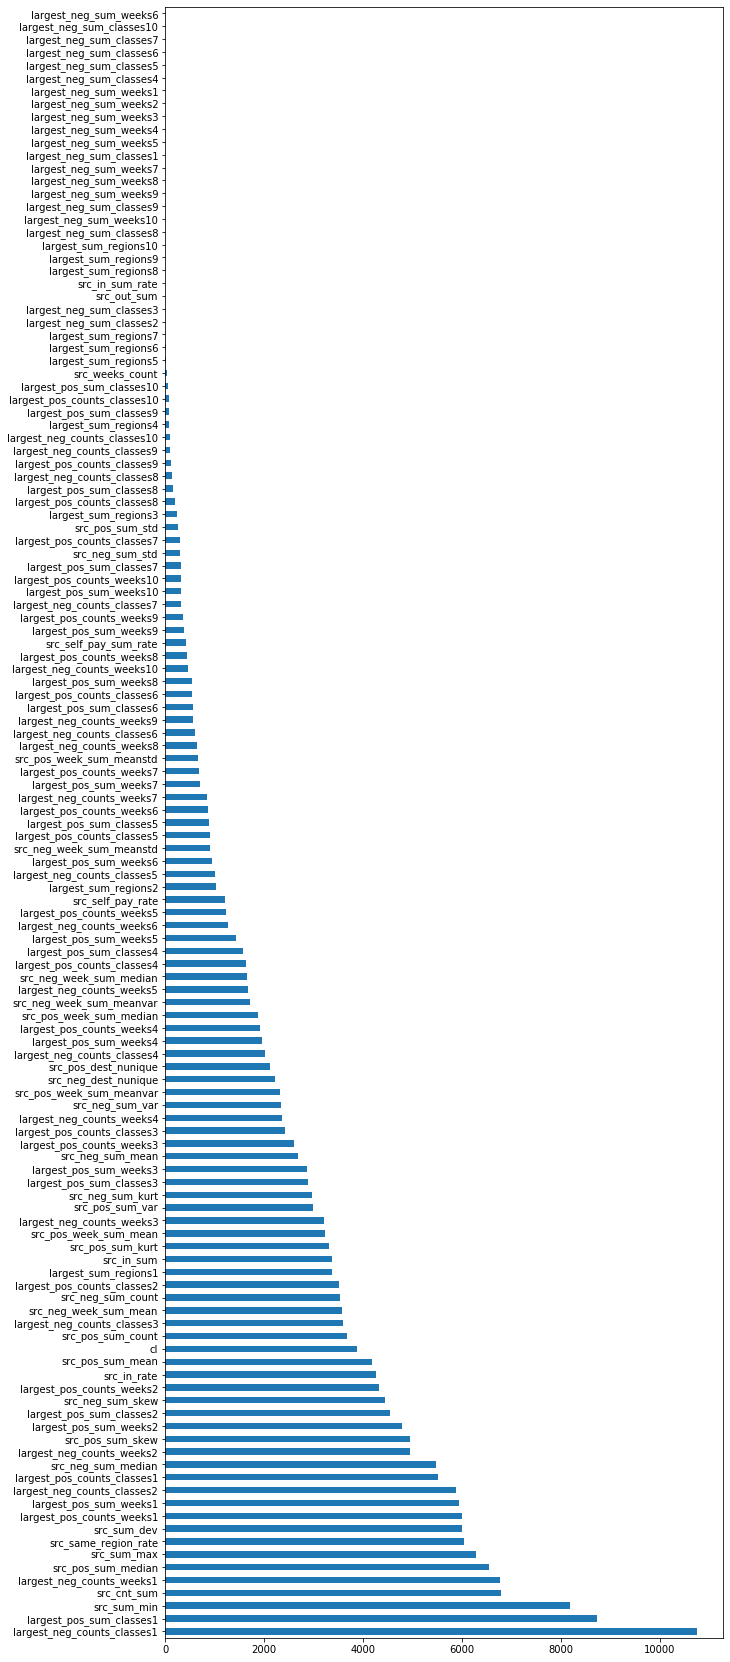

In [141]:
feature_importances = dict(zip(X_train.columns, clf.feature_importances_))
pd.Series(feature_importances).nlargest(150).plot(kind='barh', figsize=(10, 30))

### 4. Прогнозируем по второму датасету с добавлением регуляризации

In [153]:
%%time
dataset = load_from_pickle("data/dataset2_cat.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

dataset_clast = load_from_pickle("data/dataset2.pkl")
dataset_clast = dataset_clast[dataset_clast['source_class']!=-1]
dataset_clast = dataset_clast.fillna(0)
cols = dataset_clast.columns[dataset_clast.columns.str.startswith('week_sum')]
dataset_clast = dataset_clast[dataset_clast['inn'].isin(list(dataset['inn']))]
tmp = dataset_clast[['inn']]
dataset_clast = dataset_clast[cols]
scaler_clast = StandardScaler()
dataset_clast = scaler_clast.fit_transform(dataset_clast)
clust = KMeans(n_clusters = 20, max_iter = 1000)
clust.fit(dataset_clast)
cl = clust.predict(dataset_clast)
tmp['cl'] = cl
dataset = dataset.merge(tmp, left_on='inn', right_on='inn', how='inner')

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']
cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])+list(['cl'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = lightgbm.LGBMClassifier(max_depth = 3, 
                         n_estimators = 500,
                         objective = 'multiclass', 
                         class_weight = 'balanced',
                         random_state = 2,
                         reg_lambda = 0.01,
                         feature_fraction = 0.5,
                         bagging_fraction = 0.5
                             )

clf.fit(X=X_train, y=y_train, 
        #feature_name=X_train.columns, 
        categorical_feature=cat_features, 
        verbose=True)
clf.best_score_

pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))
print(classification_report(y_test, clf.predict(X_test)))

(129132, 127) (32283, 127) (129132,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cl', 'largest_neg_counts_classes1', 'largest_neg_counts_classes10', 'largest_neg_counts_classes2', 'largest_neg_counts_classes3', 'largest_neg_counts_classes4', 'largest_neg_counts_classes5', 'largest_neg_counts_classes6', 'largest_neg_counts_classes7', 'largest_neg_counts_classes8', 'largest_neg_counts_classes9', 'largest_neg_counts_weeks1', 'largest_neg_counts_weeks10', 'largest_neg_counts_weeks2', 'largest_neg_counts_weeks3', 'largest_neg_counts_weeks4', 'largest_neg_counts_weeks5', 'largest_neg_counts_weeks6', 'largest_neg_counts_weeks7', 'largest_neg_counts_weeks8', 'largest_neg_counts_weeks9', 'largest_neg_sum_classes1', 'largest_neg_sum_classes10', 'largest_neg_sum_classes2', 'largest_neg_sum_classes3', 'largest_neg_sum_classes4', 'largest_neg_sum_classes5', 'largest_neg_sum_classes6', 'largest_neg_s

0.7583733701678699
              precision    recall  f1-score   support

           0       0.06      0.17      0.09       163
           1       0.00      0.00      0.00        10
           2       0.09      0.28      0.14        18
           3       0.05      0.10      0.07       168
           4       0.48      0.40      0.44      1523
           5       0.00      0.02      0.01        50
           6       0.26      0.38      0.31       491
           7       0.03      0.05      0.03       130
           8       0.32      0.29      0.30       932
           9       0.13      0.12      0.13       377
          10       0.06      0.19      0.09       201
          11       0.21      0.47      0.29       570
          12       0.70      0.07      0.14      8983
          13       0.00      0.00      0.00        14
          14       0.59      0.38      0.46      2036
          15       0.05      0.14      0.07        87
          16       0.12      0.17      0.14       375
        

### 5. Прогнозируем по второму датасету с добавлением регуляризации и балансировки классов методом SMOTE (over-sampling) + undersampling

In [172]:
%%time
dataset = load_from_pickle("data/dataset2_cat.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

dataset_clast = load_from_pickle("data/dataset2.pkl")
dataset_clast = dataset_clast[dataset_clast['source_class']!=-1]
dataset_clast = dataset_clast.fillna(0)
cols = dataset_clast.columns[dataset_clast.columns.str.startswith('week_sum')]
dataset_clast = dataset_clast[dataset_clast['inn'].isin(list(dataset['inn']))]
tmp = dataset_clast[['inn']]
dataset_clast = dataset_clast[cols]
scaler_clast = StandardScaler()
dataset_clast = scaler_clast.fit_transform(dataset_clast)
clust = KMeans(n_clusters = 20, max_iter = 1000)
clust.fit(dataset_clast)
cl = clust.predict(dataset_clast)
tmp['cl'] = cl
dataset = dataset.merge(tmp, left_on='inn', right_on='inn', how='inner')


X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']
cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])+list(['cl'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# undersampling
n = 3000
X_train = X_train
X_train['y'] = y_train
X_train = X_train.groupby('y').apply(lambda x: x.sample(min(n,x.shape[0]), replace=False))
X_train.index = X_train.index.droplevel(0)
y_train = X_train['y']
X_train = X_train.drop(['y'], axis=1)
# oversampling
smote = SMOTE(sampling_strategy='not majority', random_state=2)
X_train, y_train = smote.fit_sample(X_train, y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = lightgbm.LGBMClassifier(max_depth = 3, 
                         n_estimators = 500,
                         objective = 'multiclass', 
                         class_weight = 'balanced',
                         random_state = 2,
                         reg_lambda = 0.1,
                         feature_fraction = 0.5,
                         bagging_fraction = 0.8
                             )

clf.fit(X=X_train, y=y_train, 
        categorical_feature=cat_features, 
        verbose=True)
clf.best_score_

pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))
print(classification_report(y_test, clf.predict(X_test)))

(129132, 127) (32283, 127) (129132,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(240000, 127) (32283, 127) (240000,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cl', 'largest_neg_counts_classes1', 'largest_neg_counts_classes10', 'largest_neg_counts_classes2', 'largest_neg_counts_classes3', 'largest_neg_counts_classes4', 'largest_neg_counts_classes5', 'largest_neg_counts_classes6', 'largest_neg_counts_classes7', 'largest_neg_counts_classes8', 'largest_neg_counts_classes9', 'largest_neg_counts_weeks1', 'largest_neg_counts_weeks10', 'largest_neg_counts_weeks2', 'largest_neg_counts_weeks3', 'largest_neg_counts_weeks4', 'largest_neg_counts_weeks5', 'largest_neg_counts_weeks6', 'largest_neg_counts_weeks7', 'largest_neg_counts_weeks8', 'largest_neg_counts_weeks9', 'largest_neg_sum_classes1', 'largest_neg_sum_classes10', 'largest_neg_sum_classes2', 'largest_neg_sum_classes3', 'largest_neg_sum_classes4', 'largest_neg_sum_classes5', 'largest_neg_sum_classes6', 'largest_neg_s

0.7625949606537302
              precision    recall  f1-score   support

           0       0.08      0.10      0.09       163
           1       0.00      0.00      0.00        10
           2       0.06      0.28      0.10        18
           3       0.06      0.05      0.06       168
           4       0.42      0.44      0.43      1523
           5       0.00      0.00      0.00        50
           6       0.22      0.37      0.28       491
           7       0.05      0.04      0.04       130
           8       0.20      0.31      0.24       932
           9       0.13      0.12      0.12       377
          10       0.09      0.10      0.10       201
          11       0.17      0.50      0.25       570
          12       0.53      0.13      0.21      8983
          13       0.00      0.07      0.01        14
          14       0.47      0.44      0.45      2036
          15       0.08      0.08      0.08        87
          16       0.10      0.17      0.13       375
        

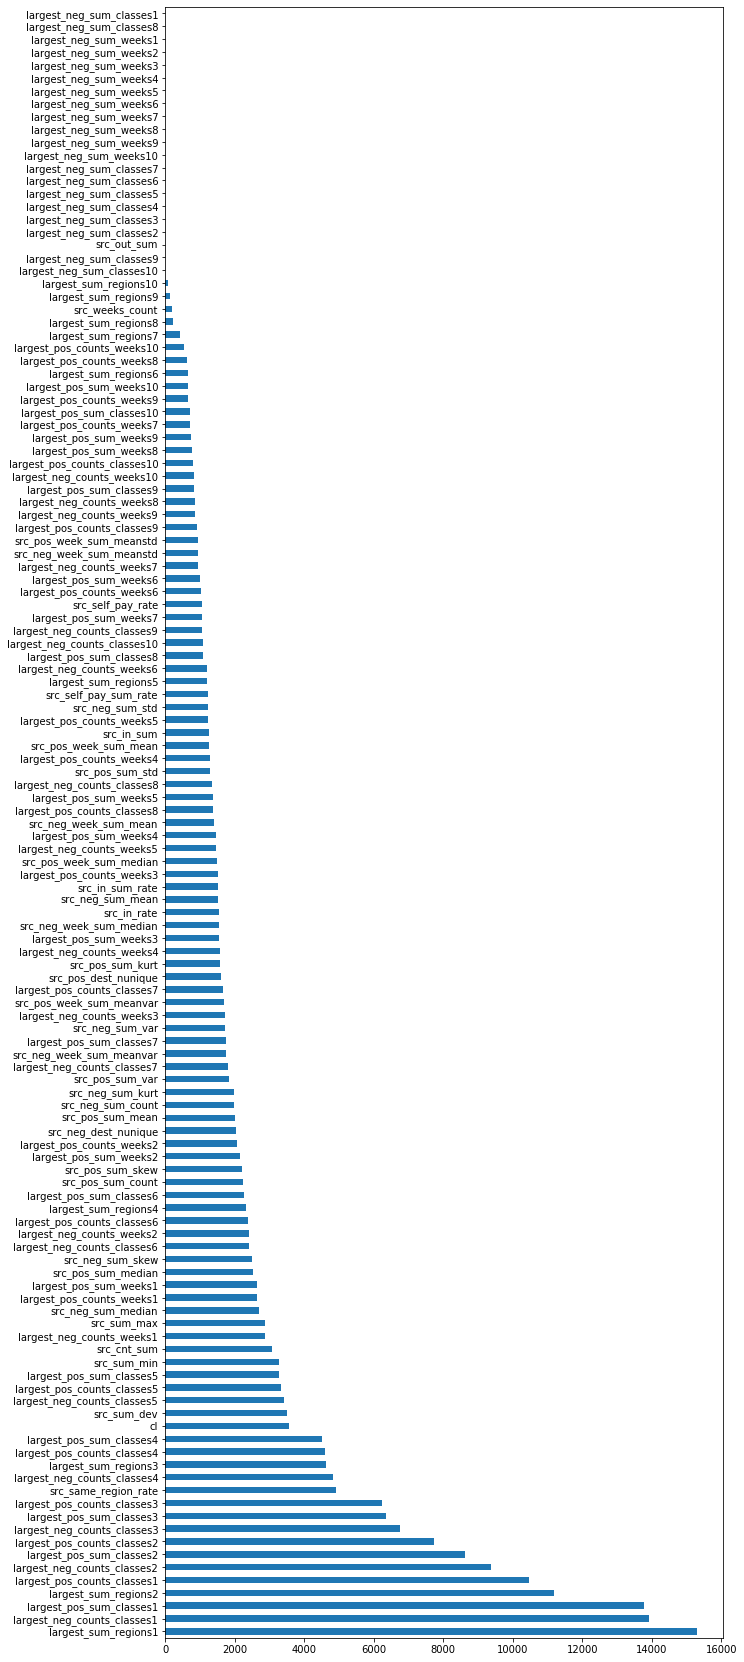

In [173]:
feature_importances = dict(zip(X_train.columns, clf.feature_importances_))
pd.Series(feature_importances).nlargest(150).plot(kind='barh', figsize=(10, 30))

#### Попробуем в этой модели убрать часть признаков

In [184]:
features = list(pd.Series(feature_importances).nlargest(50).index) + list(['inn','source_class'])
dataset = dataset[features]

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']
cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])+list(['cl'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


n = 3000
X_train = X_train
X_train['y'] = y_train
X_train = X_train.groupby('y').apply(lambda x: x.sample(min(n,x.shape[0]), replace=False))
X_train.index = X_train.index.droplevel(0)
y_train = X_train['y']
X_train = X_train.drop(['y'], axis=1)

smote = SMOTE(sampling_strategy='not majority', random_state=2)
X_train, y_train = smote.fit_sample(X_train, y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


clf = lightgbm.LGBMClassifier(max_depth = 3, 
                         n_estimators = 500,
                         objective = 'multiclass', 
                         class_weight = 'balanced',
                         random_state = 2,
                         reg_lambda = 0.1,
                         feature_fraction = 0.5,
                         bagging_fraction = 0.8
                             )

clf.fit(X=X_train, y=y_train, 
        categorical_feature=cat_features, 
        verbose=True)
clf.best_score_

pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))
print(classification_report(y_test, clf.predict(X_test)))

(129132, 50) (32283, 50) (129132,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(240000, 50) (32283, 50) (240000,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cl', 'largest_neg_counts_classes1', 'largest_neg_counts_classes2', 'largest_neg_counts_classes3', 'largest_neg_counts_classes4', 'largest_neg_counts_classes5', 'largest_neg_counts_classes6', 'largest_neg_counts_classes7', 'largest_neg_counts_weeks1', 'largest_neg_counts_weeks2', 'largest_neg_counts_weeks3', 'largest_pos_counts_classes1', 'largest_pos_counts_classes2', 'largest_pos_counts_classes3', 'largest_pos_counts_classes4', 'largest_pos_counts_classes5', 'largest_pos_counts_classes6', 'largest_pos_counts_weeks1', 'largest_pos_counts_weeks2', 'largest_pos_sum_classes1', 'largest_pos_sum_classes2', 'largest_pos_sum_classes3', 'largest_pos_sum_classes4', 'largest_pos_sum_classes5', 'largest_pos_sum_classes6', 'largest_pos_sum_classes7', 'largest_pos_sum_weeks1', 'largest_pos_sum_weeks2', 'largest_sum_regi

0.761765989752248
              precision    recall  f1-score   support

           0       0.08      0.10      0.09       163
           1       0.00      0.00      0.00        10
           2       0.03      0.22      0.06        18
           3       0.08      0.07      0.07       168
           4       0.40      0.43      0.41      1523
           5       0.00      0.00      0.00        50
           6       0.21      0.37      0.27       491
           7       0.07      0.06      0.06       130
           8       0.20      0.29      0.24       932
           9       0.13      0.11      0.12       377
          10       0.07      0.08      0.07       201
          11       0.17      0.51      0.26       570
          12       0.55      0.14      0.23      8983
          13       0.00      0.07      0.01        14
          14       0.48      0.42      0.45      2036
          15       0.05      0.06      0.05        87
          16       0.10      0.17      0.13       375
         

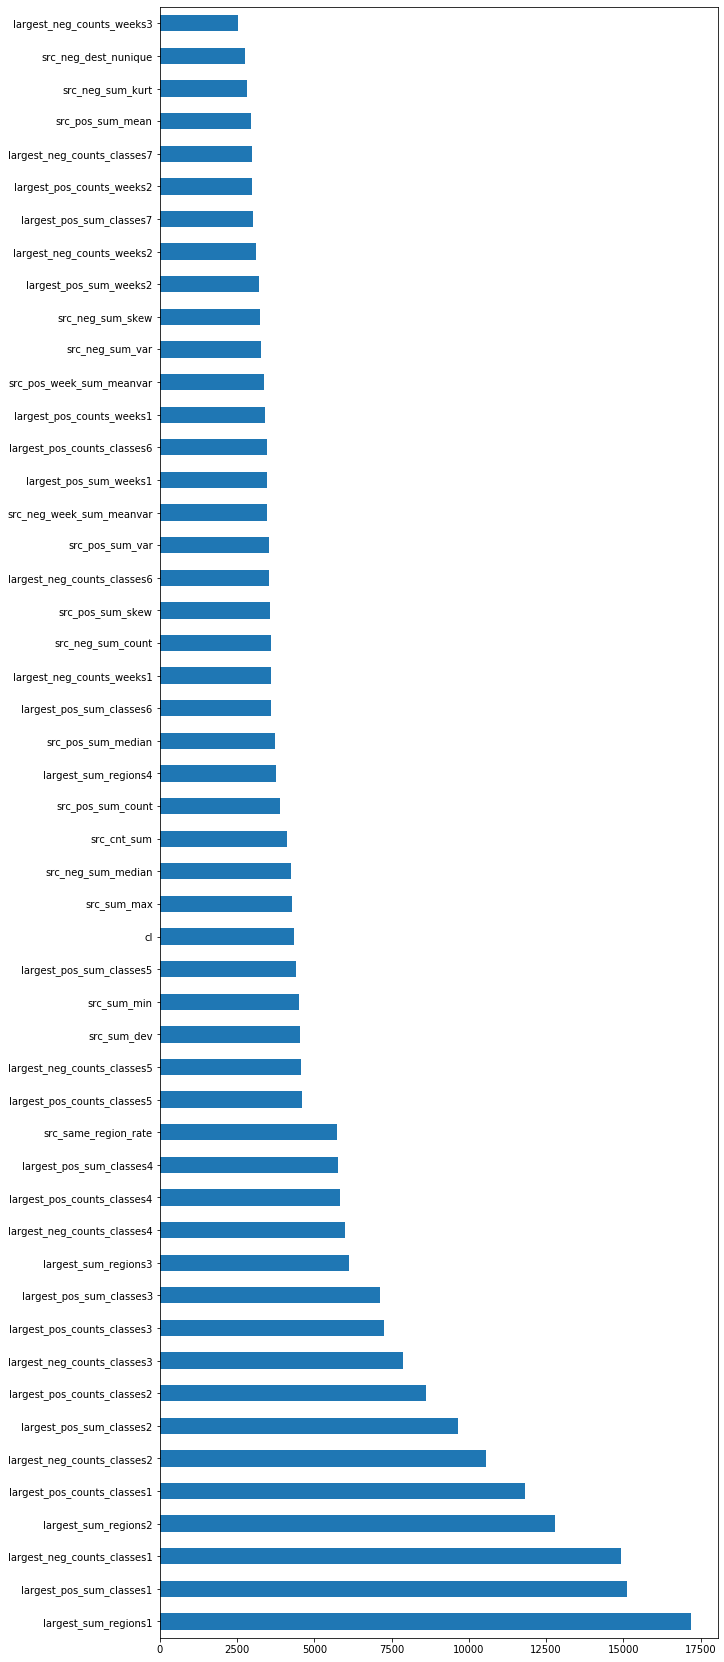

In [185]:
feature_importances = dict(zip(X_train.columns, clf.feature_importances_))
pd.Series(feature_importances).nlargest(150).plot(kind='barh', figsize=(10, 30))

### Попробуем взять несколько наборов признаков из первого датасета, и выделить по каждому набору главные компоненты. Затем включим их в модель

In [70]:
dataset = load_from_pickle("data/dataset2_cat.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

dataset_clast = load_from_pickle("data/dataset2.pkl")
dataset_clast = dataset_clast[dataset_clast['source_class']!=-1]
dataset_clast = dataset_clast.fillna(0)
dataset_clast = dataset_clast[dataset_clast['inn'].isin(list(dataset['inn']))]

In [71]:
cols = dataset_clast.columns[dataset_clast.columns.str.startswith('src')]
dataset_pca = dataset_clast[cols]
scaler_pca = StandardScaler()
dataset_pca = scaler_pca.fit_transform(dataset_pca)
pca = PCA(n_components=3)
pca_res = pca.fit_transform(dataset_pca)
pca.explained_variance_ratio_

array([0.28580806, 0.14504497, 0.07501224])

In [72]:
dataset['pca0'] = pca_res[:,0]
dataset['pca1'] = pca_res[:,1]

In [73]:
cols = dataset_clast.columns[dataset_clast.columns.str.startswith('class_sum')]
dataset_pca = dataset_clast[cols]
scaler_pca = StandardScaler()
dataset_pca = scaler_pca.fit_transform(dataset_pca)
pca = PCA(n_components=3)
pca_res = pca.fit_transform(dataset_pca)
pca.explained_variance_ratio_

array([0.12020426, 0.01310798, 0.01279097])

In [74]:
dataset['pca2'] = pca_res[:,0]

In [75]:
cols = dataset_clast.columns[dataset_clast.columns.str.startswith('class_count')]
dataset_pca = dataset_clast[cols]
scaler_pca = StandardScaler()
dataset_pca = scaler_pca.fit_transform(dataset_pca)
pca = PCA(n_components=3)
pca_res = pca.fit_transform(dataset_pca)
pca.explained_variance_ratio_

array([0.05022203, 0.01622856, 0.01453852])

In [76]:
dataset['pca3'] = pca_res[:,0]

In [77]:
cols = dataset_clast.columns[dataset_clast.columns.str.startswith('week_sum')]
dataset_pca = dataset_clast[cols]
scaler_pca = StandardScaler()
dataset_pca = scaler_pca.fit_transform(dataset_pca)
pca = PCA(n_components=3)
pca_res = pca.fit_transform(dataset_pca)
pca.explained_variance_ratio_

array([0.09075826, 0.05577201, 0.05082728])

In [78]:
dataset['pca4'] = pca_res[:,0]

In [79]:
cols = dataset_clast.columns[dataset_clast.columns.str.startswith('week_count')]
dataset_pca = dataset_clast[cols]
scaler_pca = StandardScaler()
dataset_pca = scaler_pca.fit_transform(dataset_pca)
pca = PCA(n_components=3)
pca_res = pca.fit_transform(dataset_pca)
pca.explained_variance_ratio_

array([0.09282109, 0.06543501, 0.05252055])

In [80]:
dataset['pca5'] = pca_res[:,0]

In [81]:
cols = dataset_clast.columns[dataset_clast.columns.str.startswith('week_region')]
dataset_pca = dataset_clast[cols]
scaler_pca = StandardScaler()
dataset_pca = scaler_pca.fit_transform(dataset_pca)
pca = PCA(n_components=3)
pca_res = pca.fit_transform(dataset_pca)
pca.explained_variance_ratio_

array([0.10413783, 0.06926857, 0.05882816])

In [82]:
dataset['pca6'] = pca_res[:,0]

In [83]:
cols = dataset_clast.columns[dataset_clast.columns.str.startswith('week_selfpay')]
dataset_pca = dataset_clast[cols]
scaler_pca = StandardScaler()
dataset_pca = scaler_pca.fit_transform(dataset_pca)
pca = PCA(n_components=3)
pca_res = pca.fit_transform(dataset_pca)
pca.explained_variance_ratio_

array([0.09160707, 0.06663262, 0.06396971])

In [84]:
dataset['pca7'] = pca_res[:,0]

In [85]:
dataset.head()

,inn,src_sum_max,src_sum_min,src_sum_dev,src_pos_sum_mean,src_pos_sum_median,src_neg_sum_mean,src_neg_sum_median,src_pos_week_sum_mean,src_pos_week_sum_median,...,largest_sum_regions10,source_class,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
2443,2443,880.136,-2151.028,3031.164,68.483026,12.264,-295.385043,-133.800,54.521242,11.16,...,12,29,0.730908,2.734788,-3.804392,-4.518902,2.726835,-4.139793,4.549297,-0.290983
5277,5277,3.600,-1020.704,1024.304,2.000000,2.000,-157.212374,-69.024,0.333333,0.00,...,-1,4,-0.146859,0.293588,-5.381489,-0.868991,5.203457,-3.733674,-1.000537,-0.290983
5480,5480,90.576,-59.792,150.368,40.896889,37.520,-16.672000,-9.088,15.336333,0.00,...,-1,53,-0.268763,-0.053820,-0.427228,-0.184258,0.417157,-1.571028,-1.000537,-0.290983
10387,10387,1374.848,-2358.640,3733.488,184.236925,48.804,-30.288131,-10.102,175.764454,72.44,...,-1,12,3.515035,17.412411,-6.801511,-4.719800,4.884469,-5.489325,-0.195220,-0.290983
14439,14439,-43.280,-43.280,0.000,0.000000,0.000,-43.280000,-43.280,0.000000,0.00,...,-1,62,-0.509058,-0.809308,-3.480815,1.330072,0.686233,1.757849,-1.000537,-0.290983


In [135]:
def calc_pca(dataset, col_prefixes, threshold=0.01, n_components=3):
    # ф-ция для получения главных компонент
    dataset_comp = load_from_pickle("data/dataset2.pkl")
    dataset_comp = dataset_comp.fillna(0)
    dataset_comp = dataset_comp[dataset_comp['inn'].isin(list(dataset['inn']))]
    i=0
    for prefix in col_prefixes:
        cols = dataset_comp.columns[dataset_comp.columns.str.startswith(prefix)]
        dataset_pca = dataset_comp[cols]
        scaler_pca = StandardScaler()
        dataset_pca = scaler_pca.fit_transform(dataset_pca)
        pca = PCA(n_components=n_components)
        pca_res = pca.fit_transform(dataset_pca)
        for ind,val in enumerate(pca.explained_variance_ratio_):

            if val>threshold:
                dataset['pca'+str(i)] = pca_res[:,ind]
                i+=1
    return dataset

def sample_data(X_train, y_train, n=3000):
    # ф-ция для балансировки датасета - undersampling + oversampling
    # 1. undersampling для классов с числом объектов > n
    X_train = X_train
    X_train['y'] = y_train
    X_train = X_train.groupby('y').apply(lambda x: x.sample(min(n,x.shape[0]), replace=False))
    X_train.index = X_train.index.droplevel(0)
    y_train = X_train['y']
    X_train = X_train.drop(['y'], axis=1)
    # 2. oversampling для остальных классов
    smote = SMOTE(sampling_strategy='not majority', random_state=2)
    X_train, y_train = smote.fit_sample(X_train, y_train)
    return X_train, y_train
    

In [136]:
%%time
dataset = load_from_pickle("data/dataset2_cat.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

dataset = calc_pca(dataset, ['src','class_sum','class_count', 'week_sum','week_count','week_region','week_selfpay'])

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']

cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


X_train, y_train = sample_data(X_train, y_train, n=3000)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = lightgbm.LGBMClassifier(max_depth = 3, 
                         n_estimators = 200,
                         objective = 'multiclass', 
                         #class_weight = 'balanced',
                         random_state = 2,
#                          reg_lambda = 0.1,
#                          feature_fraction = 0.5,
#                          bagging_fraction = 0.8
                        )

clf.fit(X=X_train, y=y_train, 
        categorical_feature=cat_features, 
        verbose=True)
clf.best_score_

pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))
print(classification_report(y_test, clf.predict(X_test)))

(129132, 147) (32283, 147) (129132,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(240000, 147) (32283, 147) (240000,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['largest_neg_counts_classes1', 'largest_neg_counts_classes10', 'largest_neg_counts_classes2', 'largest_neg_counts_classes3', 'largest_neg_counts_classes4', 'largest_neg_counts_classes5', 'largest_neg_counts_classes6', 'largest_neg_counts_classes7', 'largest_neg_counts_classes8', 'largest_neg_counts_classes9', 'largest_neg_counts_weeks1', 'largest_neg_counts_weeks10', 'largest_neg_counts_weeks2', 'largest_neg_counts_weeks3', 'largest_neg_counts_weeks4', 'largest_neg_counts_weeks5', 'largest_neg_counts_weeks6', 'largest_neg_counts_weeks7', 'largest_neg_counts_weeks8', 'largest_neg_counts_weeks9', 'largest_neg_sum_classes1', 'largest_neg_sum_classes10', 'largest_neg_sum_classes2', 'largest_neg_sum_classes3', 'largest_neg_sum_classes4', 'largest_neg_sum_classes5', 'largest_neg_sum_classes6', 'largest_neg_sum_cla

0.7691712168123909
              precision    recall  f1-score   support

           0       0.09      0.13      0.10       163
           1       0.00      0.00      0.00        10
           2       0.05      0.28      0.08        18
           3       0.06      0.05      0.05       168
           4       0.41      0.44      0.43      1523
           5       0.02      0.04      0.03        50
           6       0.22      0.37      0.28       491
           7       0.05      0.04      0.04       130
           8       0.21      0.30      0.24       932
           9       0.13      0.12      0.12       377
          10       0.09      0.08      0.09       201
          11       0.17      0.52      0.25       570
          12       0.55      0.12      0.20      8983
          13       0.00      0.00      0.00        14
          14       0.48      0.43      0.45      2036
          15       0.09      0.11      0.10        87
          16       0.10      0.18      0.13       375
        

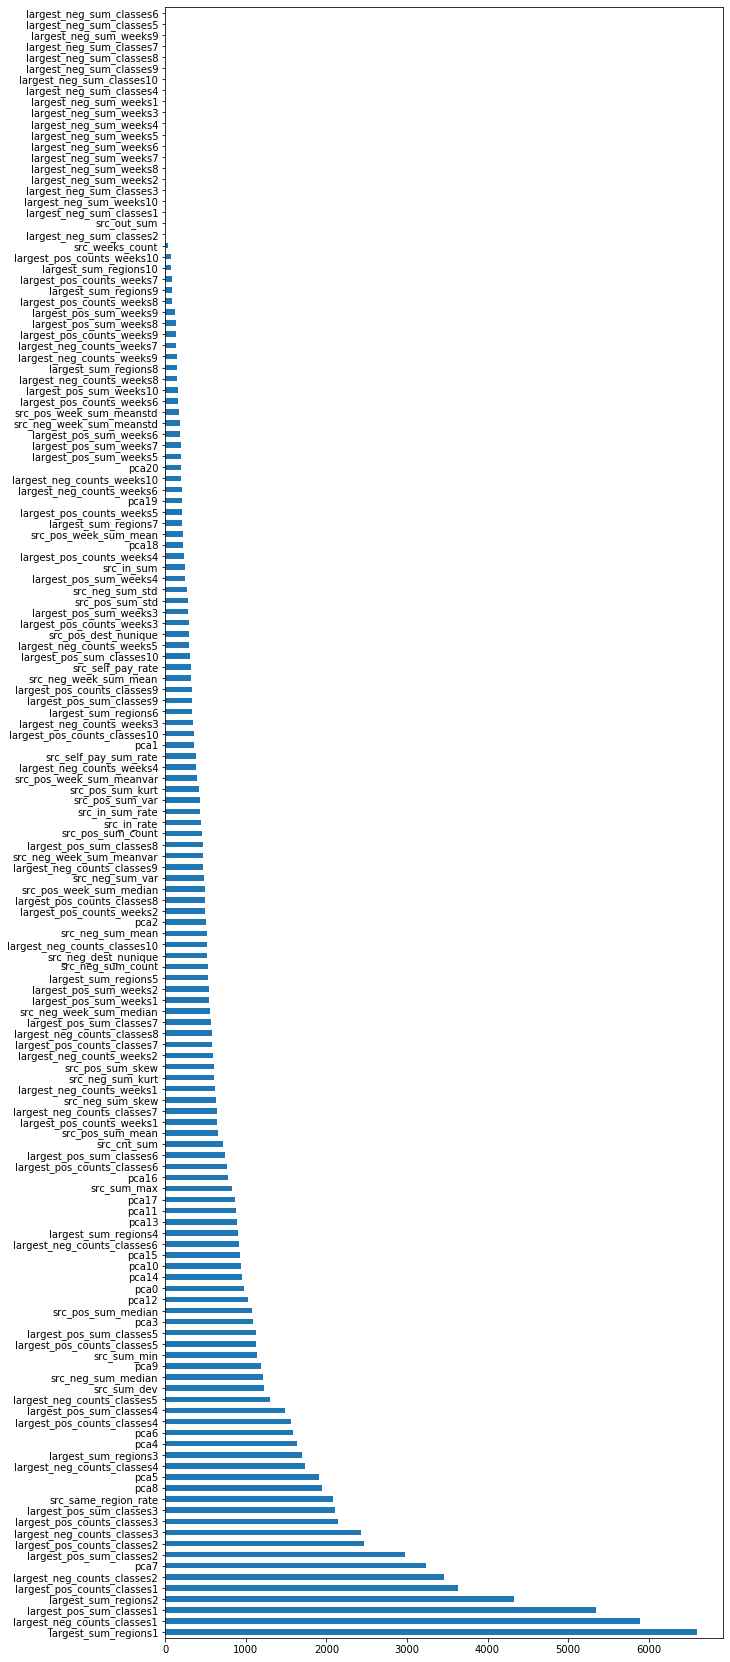

In [137]:
feature_importances = dict(zip(X_train.columns, clf.feature_importances_))
pd.Series(feature_importances).nlargest(150).plot(kind='barh', figsize=(10, 30))

In [138]:
from sklearn.metrics import f1_score
f1_score(y_true=y_test, y_pred=clf.predict(X_test), average='weighted')

0.22051195361471088

In [101]:
%%time
features = ['pca0',
 'pca5',
 'pca3',
 'pca1',
 'pca2',
 'pca4',
 'pca6',
 'largest_neg_counts_classes1',
 'largest_pos_sum_classes1',
 'largest_pos_counts_classes1',
 'largest_neg_counts_weeks1',
 'largest_pos_sum_weeks1',
 'largest_neg_counts_classes2',
 'largest_pos_counts_weeks1',
 'largest_pos_sum_classes2',
 'largest_pos_sum_weeks2',
 'largest_neg_counts_weeks2',
 'largest_pos_counts_weeks2',
 'largest_pos_counts_classes2',
 'largest_sum_regions1',
 'largest_neg_counts_weeks3',
 'largest_pos_sum_weeks3',
 'largest_neg_counts_classes3',
 'largest_pos_sum_classes3',
 'largest_pos_counts_weeks3',
 'largest_pos_counts_classes3',
 'largest_neg_counts_weeks4',
 'largest_pos_sum_weeks4',
 'largest_pos_counts_weeks4',
 'largest_neg_counts_weeks5',
 'largest_neg_counts_classes4',
 'largest_pos_counts_classes4',
 'largest_pos_sum_weeks5',
 'largest_pos_sum_classes4',
 'largest_pos_counts_weeks5',
 'pca7',
 'largest_neg_counts_weeks6',
 'largest_sum_regions2',
 'largest_neg_counts_classes5',
 'largest_sum_regions3',
 'inn',
 'source_class']

dataset = load_from_pickle("data/dataset2_cat.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

dataset = calc_pca(dataset, ['src','class_sum','class_count', 'week_sum','week_count','week_region','week_selfpay'])

cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])

dataset = dataset[features]

cols = list(dataset.columns[dataset.columns.str.startswith('largest_')])
cols = cols + list(dataset.columns[dataset.columns.str.startswith('pca')])
cols = cols + list(['inn','source_class'])
dataset = dataset[cols]

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']

cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train, y_train = sample_data(X_train, y_train, n=5000)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = lightgbm.LGBMClassifier(max_depth = 7, 
                         n_estimators = 100,
                         objective = 'multiclass', 
                         class_weight = 'balanced',
                         random_state = 2,
                         #reg_lambda = 0.1,
                         #feature_fraction = 0.5,
                         #bagging_fraction = 0.8
                             )

clf.fit(X=X_train, y=y_train, 
        categorical_feature=cat_features, 
        verbose=True)

pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))
print(classification_report(y_test, clf.predict(X_test)))

(129132, 40) (32283, 40) (129132,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(400000, 40) (32283, 40) (400000,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['largest_neg_counts_classes1', 'largest_neg_counts_classes2', 'largest_neg_counts_classes3', 'largest_neg_counts_classes4', 'largest_neg_counts_classes5', 'largest_neg_counts_weeks1', 'largest_neg_counts_weeks2', 'largest_neg_counts_weeks3', 'largest_neg_counts_weeks4', 'largest_neg_counts_weeks5', 'largest_neg_counts_weeks6', 'largest_pos_counts_classes1', 'largest_pos_counts_classes2', 'largest_pos_counts_classes3', 'largest_pos_counts_classes4', 'largest_pos_counts_weeks1', 'largest_pos_counts_weeks2', 'largest_pos_counts_weeks3', 'largest_pos_counts_weeks4', 'largest_pos_counts_weeks5', 'largest_pos_sum_classes1', 'largest_pos_sum_classes2', 'largest_pos_sum_classes3', 'largest_pos_sum_classes4', 'largest_pos_sum_weeks1', 'largest_pos_sum_weeks2', 'largest_pos_sum_weeks3', 'largest_pos_sum_weeks4', 'larg

0.7477076453345008
              precision    recall  f1-score   support

           0       0.07      0.11      0.09       163
           1       0.04      0.10      0.06        10
           2       0.05      0.28      0.08        18
           3       0.06      0.05      0.05       168
           4       0.39      0.46      0.42      1523
           5       0.01      0.06      0.02        50
           6       0.24      0.32      0.27       491
           7       0.04      0.04      0.04       130
           8       0.25      0.29      0.27       932
           9       0.15      0.09      0.11       377
          10       0.07      0.14      0.10       201
          11       0.19      0.46      0.27       570
          12       0.52      0.13      0.21      8983
          13       0.00      0.00      0.00        14
          14       0.44      0.43      0.43      2036
          15       0.06      0.10      0.08        87
          16       0.07      0.09      0.08       375
        

In [189]:
%%time
dataset = load_from_pickle("data/dataset2_cat.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

dataset = calc_pca(dataset, ['src','class_sum','class_count', 'week_sum','week_count','week_region','week_selfpay'])

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']

cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


X_train, y_train = sample_data(X_train, y_train, n=5000)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = lightgbm.LGBMClassifier(max_depth = 5, 
                         n_estimators = 300,
                         objective = 'multiclass', 
                         class_weight = 'balanced',
                         random_state = 2
                        )

clf.fit(X=X_train, y=y_train, 
        categorical_feature=cat_features, 
        verbose=True)

pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))
print(classification_report(y_test, clf.predict(X_test)))

(129132, 147) (32283, 147) (129132,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(400000, 147) (32283, 147) (400000,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['largest_neg_counts_classes1', 'largest_neg_counts_classes10', 'largest_neg_counts_classes2', 'largest_neg_counts_classes3', 'largest_neg_counts_classes4', 'largest_neg_counts_classes5', 'largest_neg_counts_classes6', 'largest_neg_counts_classes7', 'largest_neg_counts_classes8', 'largest_neg_counts_classes9', 'largest_neg_counts_weeks1', 'largest_neg_counts_weeks10', 'largest_neg_counts_weeks2', 'largest_neg_counts_weeks3', 'largest_neg_counts_weeks4', 'largest_neg_counts_weeks5', 'largest_neg_counts_weeks6', 'largest_neg_counts_weeks7', 'largest_neg_counts_weeks8', 'largest_neg_counts_weeks9', 'largest_neg_sum_classes1', 'largest_neg_sum_classes10', 'largest_neg_sum_classes2', 'largest_neg_sum_classes3', 'largest_neg_sum_classes4', 'largest_neg_sum_classes5', 'largest_neg_sum_classes6', 'largest_neg_sum_cla

0.7645211913426371
              precision    recall  f1-score   support

           0       0.06      0.09      0.07       163
           1       0.00      0.00      0.00        10
           2       0.06      0.06      0.06        18
           3       0.06      0.08      0.07       168
           4       0.35      0.48      0.41      1523
           5       0.02      0.02      0.02        50
           6       0.29      0.37      0.33       491
           7       0.08      0.05      0.06       130
           8       0.25      0.29      0.27       932
           9       0.14      0.13      0.13       377
          10       0.06      0.08      0.07       201
          11       0.21      0.48      0.29       570
          12       0.54      0.21      0.30      8983
          13       0.00      0.00      0.00        14
          14       0.42      0.49      0.45      2036
          15       0.05      0.07      0.06        87
          16       0.11      0.14      0.12       375
        

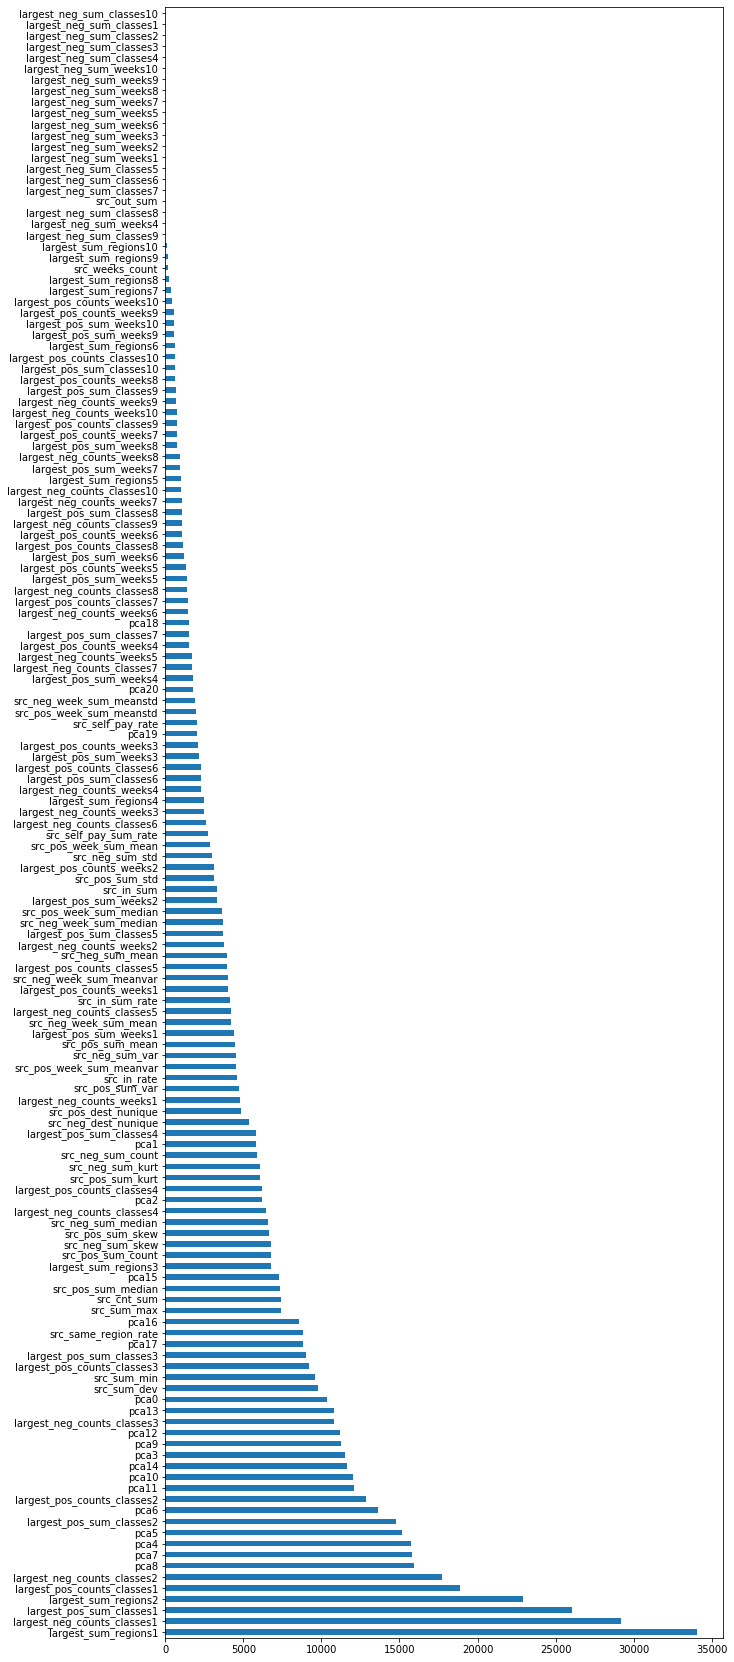

In [190]:
feature_importances = dict(zip(X_train.columns, clf.feature_importances_))
pd.Series(feature_importances).nlargest(150).plot(kind='barh', figsize=(10, 30))

In [203]:
dataset = load_from_pickle("data/dataset2_cat.pkl")
dataset = dataset.fillna(0)
dataset = calc_pca(dataset, ['src','class_sum','class_count', 'week_sum','week_count','week_region','week_selfpay'])

important_features = list(pd.Series(feature_importances).nlargest(150).index)
df = dataset[important_features]
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_cor = [column for column in upper.columns if any(upper[column] > 0.7)]
print("Highly correlated features count: ", len(high_cor))
print("Highly correlated features: ", high_cor)

selected_features = [i for i in important_features if i not in high_cor]
print("Selected features count: ", len(selected_features)) 
print("Selected features: ", selected_features)

Highly correlated features count:  45
Highly correlated features:  ['largest_pos_counts_classes1', 'pca9', 'src_sum_dev', 'src_sum_min', 'src_sum_max', 'pca15', 'src_neg_sum_median', 'src_pos_sum_kurt', 'src_neg_sum_count', 'pca1', 'src_neg_dest_nunique', 'src_pos_dest_nunique', 'src_pos_sum_var', 'src_pos_week_sum_meanvar', 'src_neg_sum_var', 'src_pos_sum_mean', 'src_neg_week_sum_mean', 'largest_pos_counts_weeks1', 'src_neg_week_sum_meanvar', 'src_neg_sum_mean', 'largest_pos_sum_classes5', 'src_in_sum', 'src_pos_sum_std', 'largest_pos_counts_weeks2', 'src_neg_sum_std', 'src_pos_week_sum_mean', 'largest_pos_counts_classes6', 'largest_pos_counts_weeks3', 'src_pos_week_sum_meanstd', 'src_neg_week_sum_meanstd', 'largest_pos_counts_weeks4', 'largest_pos_counts_classes7', 'largest_pos_counts_weeks5', 'largest_pos_counts_weeks6', 'largest_pos_sum_classes8', 'largest_neg_counts_weeks7', 'largest_neg_counts_weeks8', 'largest_pos_counts_weeks7', 'largest_neg_counts_weeks9', 'largest_pos_sum_cla

In [205]:
selected_features = list(selected_features)  + list(['inn','source_class'])

In [207]:
%%time
dataset = load_from_pickle("data/dataset2_cat.pkl")
dataset = dataset[dataset['source_class']!=-1]
dataset = dataset.fillna(0)

dataset = calc_pca(dataset, ['src','class_sum','class_count', 'week_sum','week_count','week_region','week_selfpay'])

# selected_features = list(pd.Series(feature_importances).nlargest(22).index) + list(['inn','source_class'])
dataset = dataset[selected_features]

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']

cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


X_train, y_train = sample_data(X_train, y_train, n=5000)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = lightgbm.LGBMClassifier(max_depth = 5, 
                         n_estimators = 300,
                         objective = 'multiclass', 
                         class_weight = 'balanced',
                         random_state = 2,
                         reg_lambda = 0.1
                        )

clf.fit(X=X_train, y=y_train, 
        categorical_feature=cat_features, 
        verbose=True)

pred = clf.predict_proba(X_test)
print(roc_auc_score(y_true=y_test, y_score=pred, multi_class='ovo', average='weighted'))
print(classification_report(y_test, clf.predict(X_test)))

(129132, 102) (32283, 102) (129132,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(400000, 102) (32283, 102) (400000,) (32283,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['largest_neg_counts_classes1', 'largest_neg_counts_classes10', 'largest_neg_counts_classes2', 'largest_neg_counts_classes3', 'largest_neg_counts_classes4', 'largest_neg_counts_classes5', 'largest_neg_counts_classes6', 'largest_neg_counts_classes7', 'largest_neg_counts_classes8', 'largest_neg_counts_classes9', 'largest_neg_counts_weeks1', 'largest_neg_counts_weeks10', 'largest_neg_counts_weeks2', 'largest_neg_counts_weeks3', 'largest_neg_counts_weeks4', 'largest_neg_counts_weeks5', 'largest_neg_counts_weeks6', 'largest_neg_sum_classes1', 'largest_neg_sum_classes10', 'largest_neg_sum_classes2', 'largest_neg_sum_classes3', 'largest_neg_sum_classes4', 'largest_neg_sum_classes5', 'largest_neg_sum_classes6', 'largest_neg_sum_classes7', 'largest_neg_sum_classes8', 'largest_neg_sum_classes9', 'largest_neg_sum_weeks1

0.756140161231474
              precision    recall  f1-score   support

           0       0.06      0.09      0.07       163
           1       0.00      0.00      0.00        10
           2       0.20      0.17      0.18        18
           3       0.08      0.08      0.08       168
           4       0.37      0.47      0.41      1523
           5       0.01      0.02      0.01        50
           6       0.27      0.31      0.28       491
           7       0.09      0.07      0.08       130
           8       0.25      0.28      0.27       932
           9       0.11      0.12      0.12       377
          10       0.07      0.10      0.08       201
          11       0.20      0.49      0.29       570
          12       0.55      0.16      0.25      8983
          13       0.00      0.00      0.00        14
          14       0.44      0.47      0.45      2036
          15       0.05      0.07      0.06        87
          16       0.09      0.13      0.11       375
         

### Обучение на всем тренировочном датасете и формирование результата

In [209]:
%%time
dataset = load_from_pickle("data/dataset2_cat.pkl")

dataset = dataset.fillna(0)

dataset = calc_pca(dataset, ['src','class_sum','class_count', 'week_sum','week_count','week_region','week_selfpay'])

# dataset = dataset[selected_features]
# print('features: ', selected_features)
selected_features = list(pd.Series(feature_importances).nlargest(50).index) + list(['inn','source_class'])
dataset = dataset[selected_features]

X = dataset.drop(['inn','source_class'], axis=1)
y = dataset['source_class']

cat_features = list(dataset.columns[dataset.columns.str.startswith('largest_')])

X_train = dataset[dataset['source_class']!=-1].drop(['inn','source_class'], axis=1)
y_train = dataset[dataset['source_class']!=-1]['source_class']
X_test = dataset[dataset['source_class']==-1].drop(['inn','source_class'], axis=1)
print(X_train.shape, X_test.shape, y_train.shape)

X_train, y_train = sample_data(X_train, y_train, n=5000)
print(X_train.shape, X_test.shape, y_train.shape)

clf = lightgbm.LGBMClassifier(max_depth = 5, 
                         n_estimators = 300,
                         objective = 'multiclass', 
                         class_weight = 'balanced',
                         random_state = 2
                        )

clf.fit(X=X_train, y=y_train, 
        categorical_feature=cat_features, 
        verbose=True)

pred = clf.predict(X_test)

save_to_pickle(clf, "data/model.pkl")
save_to_pickle(selected_features, "data/features.pkl")

(161415, 50) (78654, 50) (161415,)
(400000, 50) (78654, 50) (400000,)


c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['largest_neg_counts_classes1', 'largest_neg_counts_classes2', 'largest_neg_counts_classes3', 'largest_neg_counts_classes4', 'largest_neg_counts_weeks1', 'largest_pos_counts_classes1', 'largest_pos_counts_classes2', 'largest_pos_counts_classes3', 'largest_pos_counts_classes4', 'largest_pos_sum_classes1', 'largest_pos_sum_classes2', 'largest_pos_sum_classes3', 'largest_pos_sum_classes4', 'largest_sum_regions1', 'largest_sum_regions2', 'largest_sum_regions3']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Wall time: 13min 15s


In [210]:
result = pd.DataFrame(index=X_test.index)
result['hash_inn'] = result.index
result['y'] = pred
result.head()

,hash_inn,y
0,0,62
5121,5121,62
16701,16701,62
20624,20624,55
26464,26464,32


In [211]:
result['y'].value_counts()

12    6411
34    5250
14    4894
52    4674
4     4360
55    3469
8     3319
11    3236
26    2743
61    2368
39    2342
6     1881
18    1757
62    1683
46    1480
48    1452
29    1319
16    1315
79    1106
10    1058
76    1049
56     927
71     918
53     878
68     875
47     849
9      842
42     801
50     735
20     686
0      675
54     648
67     606
65     576
22     576
43     536
21     508
32     458
70     432
3      422
77     421
74     396
38     360
24     353
60     317
23     313
64     310
41     301
31     292
59     284
33     273
40     272
30     263
7      256
15     246
78     243
69     241
45     217
17     212
13     210
57     196
25     195
49     193
37     172
5      170
66     170
44     170
72     162
51     158
27     146
35     142
28     137
58     120
2      109
75     105
19     103
73      97
63      90
36      71
1       54
Name: y, dtype: int64

In [212]:
len(result['y'].value_counts())

80

In [213]:
result_inn = list(result_inn)

In [214]:
set(test_inn).difference(result_inn)

set()

In [215]:
result[['hash_inn','y']].sort_index().to_csv("data/JuliaSemenovykh-02052020-SberbankIndustry.csv", sep=',', index=False)